## 2. Background


#### DE of simple pendulum

In [91]:
def f(t, X):
    g = -9.81
    l = 2.0
    X_new = np.empty(X.shape)
    X_new[0] = X[1]
    X_new[1] = -g/l*np.sin(X[0])
    return X_new

#### Forward Euler (FE) method

1000 points evaluated
Min step 0.004999999999999893 and max step 0.005000000000000782


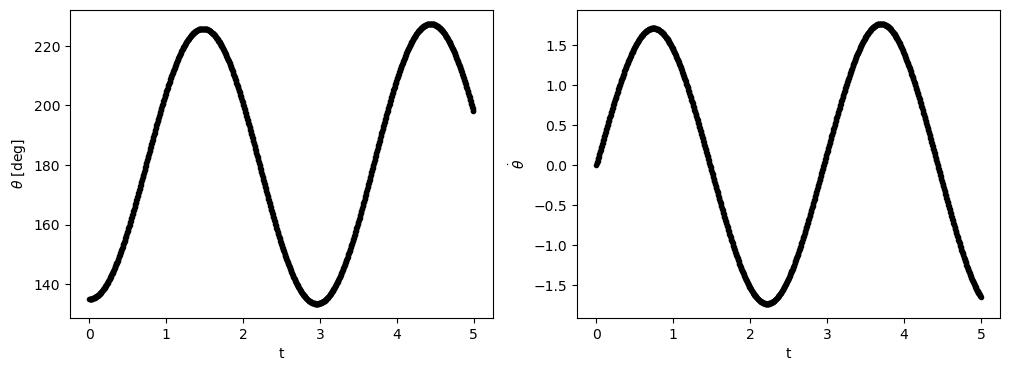

In [134]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

Delta_t = 0.005
t_0 = 0.0
t_n = 5.0
t_eval = np.arange(t_0, t_n, Delta_t)
y0 = [np.pi-np.pi/4, 0] # np.pi is pointing downwards and leads to no dynamic behavior, initial angular velocity is zero

sol.t = t_eval
sol.y = np.empty((sol.t.shape[0],2))
sol.y[0,:] = y0

for n in range(0,len(sol.t)-1):
    sol.y[n+1,:] = sol.y[n,:]+Delta_t*f(sol.t[n], sol.y[n,:])

print(f'{len(sol.t)} points evaluated')
print(f'Min step {np.min(sol.t[1:]-sol.t[0:-1])} and max step {np.max(sol.t[1:]-sol.t[0:-1])}')
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[:,0]*180/np.pi)
plt.plot(sol.t, sol.y[:,0]*180/np.pi,'k.')
plt.xlabel('t')
plt.ylabel(r'$\theta$ [deg]')
plt.subplot(122)
plt.plot(sol.t, sol.y[:,1])
plt.plot(sol.t, sol.y[:,1],'k.')
plt.xlabel('t')
plt.ylabel(r'$\dot\theta$')
plt.tight_layout
plt.savefig('ode_pendulum_euler_100pts.png')
plt.show()

#### Adaptive stepsize Runge-Kutta-Fehlberg (RK45)

25 points evaluated
Min step 0.011340313177106789 and max step 0.25686236602027934


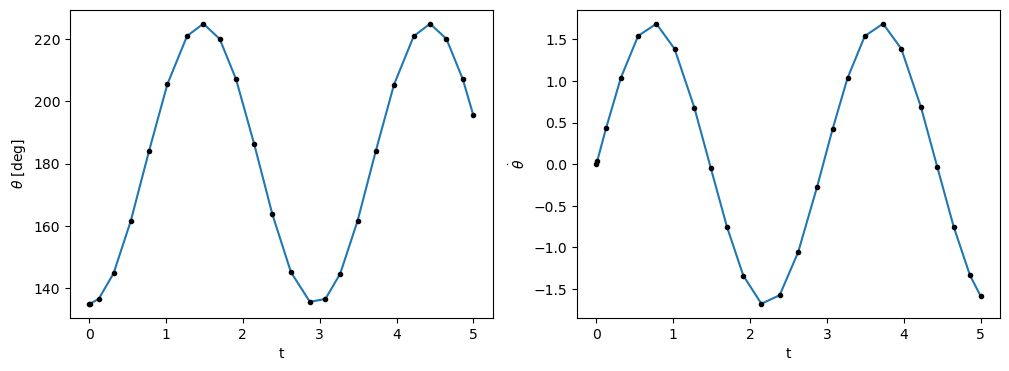

In [131]:
sol = solve_ivp(f, [t_0, t_n], y0, method = 'RK45', rtol=0.000025, atol=0.000001) #t_eval=np.arange(0, 10, 0.01))

print(f'{len(sol.t)} points evaluated')
print(f'Min step {np.min(sol.t[1:]-sol.t[0:-1])} and max step {np.max(sol.t[1:]-sol.t[0:-1])}')
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0]*180/np.pi)
plt.plot(sol.t, sol.y[0]*180/np.pi,'k.')
plt.xlabel('t')
plt.ylabel(r'$\theta$ [deg]')
plt.subplot(122)
plt.plot(sol.t, sol.y[1])
plt.plot(sol.t, sol.y[1],'k.')
plt.xlabel('t')
plt.ylabel(r'$\dot\theta$')
plt.tight_layout
plt.savefig('ode_pendulum_rk45.png')
plt.show()

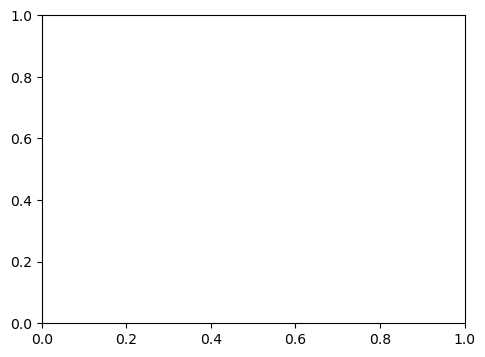

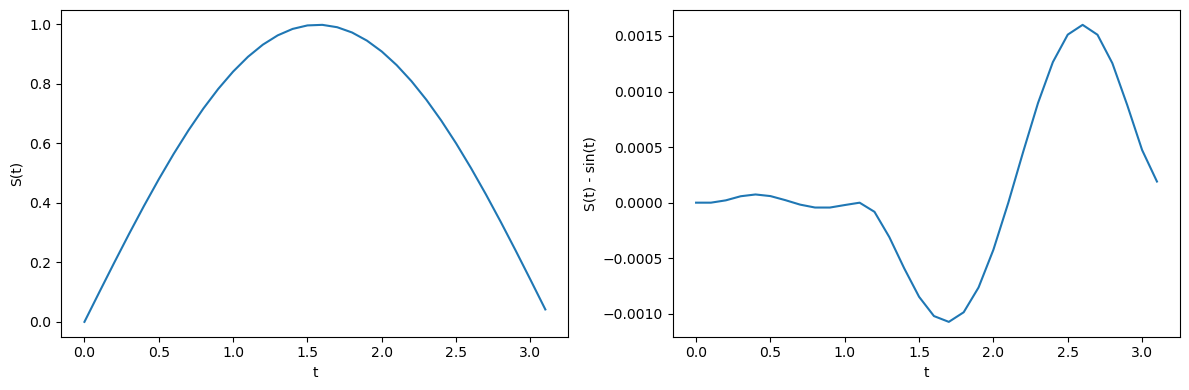

(1, 32)


In [97]:
F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()
print(sol.y.shape) you

### 2.2 Modeling sequential data

#### Simple pendulum

The illustrative environment is the Gymnasium environment *Pendulum* 

<div><img src="images/pendulum.png"/></div>

The observation space $\mathbf{y}$ is (note that x and y denote the cartesian coordinates below)

 * $y_0 = x = \cos\theta$
 * $y_1 = y = \sin\theta$
 * $y_2 = \dot\theta$

The action space is the produced torque

 * $u \in [-2,+2]$

The initial state is

 * $\theta_0 \in [ -180,+180 ]$
 * $\dot\theta_0 \in [ -1,+1 ]$   

The full description is available at the Gymnasium::[pendulum](https://gymnasium.farama.org/environments/classic_control/pendulum/).

**Gymnasium API** Install Gymnasium and then create the Pendulum environment

In [1]:
import gymnasium as gym
import numpy as np
env = gym.make('Pendulum-v1', g=9.81)

print(env.action_space.shape[0])
print(env.observation_space.shape[0])

1
3


**Trajectory** Generate trajectory of variable length between 100 and 200 samples. This corresponds to real data where recorded trajectories can have different number of samples, and we must deal with them.

In [2]:
def gen_trajectory(env_, traj_len_):

    observation, info = env_.reset()

    u_vec = np.empty((traj_len_,env_.action_space.shape[0]))
    y_vec = np.empty((traj_len_,env_.observation_space.shape[0]))

    for t in range(traj_len_):
        y_vec[t,:] = observation
        action = [0]
        u_vec[t] = action
        observation, reward, terminated, truncated, info = env.step(action)
    return y_vec, u_vec, t
foo,_,_ = gen_trajectory(env, 100)
print(foo.shape)
print(f'Starting point is theta={foo[0,:]}')

(100, 3)
Starting point is theta=[-0.97643787  0.2157988  -0.81983572]


**Example 1** Plot the state variables. Re-run until you see three sinusoidal curves.

Starting point is theta=[-0.69779205  0.71630037 -0.07315895]


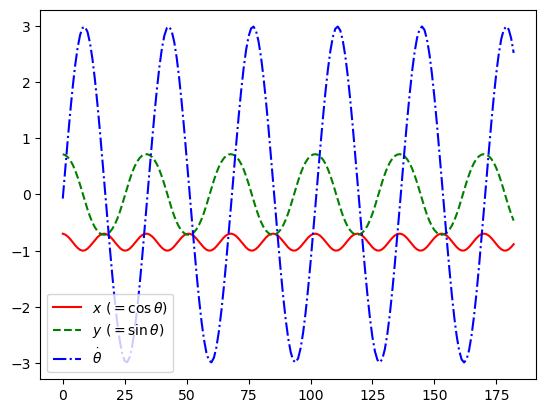

In [3]:
import matplotlib.pyplot as plt

y_vec, u_vec, t_max = gen_trajectory(env,np.random.randint(100,high=201))
print(f'Starting point is theta={y_vec[0,:]}')
plt.plot(range(t_max), y_vec[:t_max,0],'r-',
         range(t_max), y_vec[:t_max,1],'g--',
         range(t_max), y_vec[:t_max,2],'b-.')
plt.legend([rdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABKUAAAGGCAYAAACqvTJ0AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAADR6UlEQVR4nOzdd3xb9bk/8M/R9pDkeA85jhPbWY6dQSiEFVYgtEBKbyEUyjIkoYHSAh2ht7uQjh8dF0oSWkO5ZYSWAoXbQkkgBChQIMvOtpM4tryn5KV5zu8P6XtkJ3a8JJ31vF8vvV6trdiPzZF8znOewQmCIIAQQgghhBBCCCGEkDjSSR0AIYQQQgghhBBCCNEeSkoRQgghhBBCCCGEkLijpBQhhBBCCCGEEEIIiTtKShFCCCGEEEIIIYSQuKOkFCGEEEIIIYQQQgiJO0pKEUIIIYQQQgghhJC4o6QUIYQQQgghhBBCCIk7SkoRQgghhBBCCCGEkLgzSB2AHPE8j6amJlitVnAcJ3U4hBBCCJEBQRDQ29uL3Nxc6HR0X4+h8yZCCCGEnGq8502UlBpBU1MT8vPzpQ6DEEIIITLU0NAAh8MhdRiyQedNhBBCCBnNWOdNlJQagdVqBRD65dlsNomjIYQQQogcuN1u5Ofni+cJJITOmwghhBByqvGeN8kqKbVx40a8/PLLOHz4MBISErBs2TL84he/wOzZs8XnjFYW/stf/hLf+ta3AADLly/Hzp07h33+hhtuwNatW8cVB/seNpuNTq4IIYQQMgy1qA1H502EEEIIGc1Y502yGoiwc+dOrF+/Hh9//DG2bduGQCCAFStWoL+/X3xOc3PzsMdTTz0FjuPwpS99adjXuuuuu4Y9b8uWLfH+cQghhBBCCCGEEELIKGRVKfXmm28O+/9PP/00MjMzsWvXLlx44YUAgOzs7GHP+fvf/46LL74YM2fOHPbxxMTE055LCCGEEEIIIYQQQuRBVpVSp3K5XACA1NTUET/f2tqKf/zjH6ioqDjtc8899xzS09Mxf/58PPjgg+jt7R31+3i9Xrjd7mEPQgghhBBCCCGEEBI7sqqUGkoQBNx///04//zzUVpaOuJznnnmGVitVlx33XXDPn7TTTehsLAQ2dnZ2L9/PzZs2IB9+/Zh27ZtI36djRs34sc//nHUfwZCCCGEEEIIIYQQMjJOEARB6iBGsn79evzjH//ABx98MOr6wDlz5uDyyy/HY489dsavtWvXLpx11lnYtWsXFi9efNrnvV4vvF6v+P/ZlHiXy0UDOwkhhBACIHR+YLfb6fzgFPR7IYQQQsipxnt+IMtKqXvvvRevvfYa3nvvvVETUu+//z6OHDmCF198ccyvt3jxYhiNRtTU1IyYlDKbzTCbzVOOmxBCCCGEEEIIIYSMj6ySUoIg4N5778Urr7yCd999F4WFhaM+t7KyEkuWLEF5efmYX/fAgQPw+/3IycmJZriEEEIIIYQQQgghZJJklZRav349nn/+efz973+H1WpFS0sLAMButyMhIUF8ntvtxl//+lc8+uijp32NY8eO4bnnnsNVV12F9PR0HDx4EA888AAWLVqE8847L24/CyGEEEIIIYQQQggZnay2723atAkulwvLly9HTk6O+Di1RW/r1q0QBAE33njjaV/DZDLh7bffxhVXXIHZs2fj61//OlasWIHt27dDr9fH60chhBBCCCGEEEIIIWcg20HnUqKBnYSQ0TidTtTU1KC4uHjUmXeERBMdc/JB5wcjo98LIYQQQk413vMDWVVKETIRTqcTO3bsgNPplDoUohGVlZUoKCjAJZdcgoKCAlRWVkodElE5OuYIIYSMJshTbQGJL54X0Or2SB0GURlKShHZOlPS6Q9/+CNdqJGoG+2Y43kB2z89iLvWrAHP8+GP8Vi7di0lRUnMfLq/BnfdRcccIXLW2efFn/59Ajds+Qg/eu0AeEoSkDhodg3iu3+rwpzvv4Ef/n0/qPGFxENtWx9WPfFvfO6Rt/Grfx2m445EjawGnRPCVFZWYk04AcBxOlxy138je+lV6OjzoqnRiepH1wDhN0J2oXbFFVdQawuZtKHHnE6nw8OPPgbHOZ/Hh8c68NGxTjQf2gUhnBxggsEgamtr6bgjUzK0PS8vLw8fHuvEMx/W4fU3t0EQ6JgjRG48/iC2HWzFK3sasfNou1it8p8TXciwmrH+4iKJIyRq1dXvw6Z3a/HMRyfhC4T+Pjzz0UnYE024//ISiaMjasXzAp75qA4/f+MwvOHj7vc7jmHQx+P7X5gLjuMkjpAoHSWliOw4nU4xOQAAgsDj7T/8DHn6mTDY0uFxnhQTUgxdqJGpOPWY43keG+6/F3nrkmCwpQMAbFkOtHG6YUkCvV6PoiK6+CCTNywBr9Nhzn89gIHCiwAA+pRcgNMBQ445TqdDQeFMqcIlRPOqnS589an/oGfAL36szGHHvBwbtn7agP/31hGU5tlxUUmGhFEStRn0BfGH94/jyfeOo88bAACcXZiKs2ek4vEdtfift2uQaTXj5nMKJI6UqE2zaxDf+msVPqjtAABcUJyOc2el4ZdvHsFT/z4BbyCIn15bCp2OElNk8igpRWSnpqZGTA6IBB5rFiZi+fKzEXDPxOV/+e9hz+F0OkoOkEkb7ZgrsvThi5ctw3lFaSjPT8H/LvBh7dq1CAaDAKfD1et/SIlQMmmnJeB5Hof++iiKvr4Aq5cvwq3LLsTOJYFhx9y0FffgxYMD+C5dd5Ao2rRpEzZt2oS6ujoAwPz58/GDH/wAK1eulDYwmREEAT/9v4PoGfAjLyUBX1yUh1WL8lCUmSw+Z+unDfj6C3vwf/eej/zURAmjJWpy/1/24o39LQCAeTk2fPvK2bioJAMcx8Gg5/Db7TX4/t/3Iz3ZhCtLcySOlqjFm/ub8e2XquD2BGAx6vDQVXPx1XMKwHEc0pPN+M7fqvDcf+rhDfD4xZfKoKfEFJkkSkoR2WnnpgEcN6waSq/X446rzoXDkQEgA08++eRpF2odQjIoPUAmo7i4GDqdblhiSq/X49n7rx2WdKqoqMAVV1yBv7zzCX79cS/2JaZjd303Fk+fJkXYROFGS4b+9qocfH5FKQCgKHzM1dbWosFvxfffbsHmncdwzsxULJ+dKUHURI0cDgd+/vOfizd3nnnmGVx77bXYs2cP5s+fL3F08vHv2k58UtcFk0GHl7+2DFk2y7DP//ja+TjU0ot9DT1Y8+ddePnuZUgw6SWKlqjF4RY33tjfAo4DfnP9QlxTnjusKuW+S4vR6vbihU/q8fWte/HnO0z43Mw0CSMmatDq9uDeF/bAHxRQnp+CX19fjlkZkQT89Wflw2zQ4f6/7MNLu5zw+IP47Q0LYdDTyGoycXTUEFnxBXhs/qwHqVfcC04XOjz1ej22bNlyWnKgrq4OO3bswJ2//yes5SvwQxowSiYpNzcPc7/8YKhVCiMfc4zD4cD9t1yH6y8qBy8A336pCt5AMN4hExUoKioSjzlGr9ejfN6cYR9zOBxYvnw5vnr5Enw13JrxwF/20fYbEjVXX301rrrqKpSUlKCkpAQPP/wwkpOT8fHHH0sdmmwIgoDfbD8KAPjK2dNPS0gBgNmgx+abFyMtyYRDzW5seLmKBgGTKduy8zgAYGVpNlYtyjutTYrjOPz02vm4fF4WfAEed/7vZ6hp7ZUiVKIif/7oJPxBAYunp+Bv684dlpBirl2Yh99/ZTGMeg7/V9WMrZ82SBApUQNKShFZ+d+P6nC8ox+F530BB4/UYseOHairq0NFRcVpz2UXag/fdBGSzQbsa+jBS7tpKxWZuNermtA340LM/sYzeP2Nt0Y95ob6wdXzkJ5sRm1bH/7n7Zo4RUrU5NiAGalX3DOuZCjzvc/PxdwcGzr7ffjG1r20DpxEXTAYxNatW9Hf349zzz13xOd4vV643e5hD7V7v6YDu052w2zQ4WvLZ436vBx7An5/02LodRxe3duE//3oZByjJGrj7B7Aa/uaAADrLhr9uDPodXjsxkVYUjANvZ4AfvHm4XiFSFTI4w/iuf+E3rvWXDjzjNVPV5Zm4ztXhm6mPfNhHSXiyaRQUorIRkefF7/bHrq4//YVczCnqBDLly8fc2ZPps2Cr18aajn45ZuH4fb4z/h8QobyBXg8+lbo7ve9V5+DL1x5+bjmRKUkmvCzVaEWq807j2N/oyumcRJ1EQQBv3u7BtbyFfjW09vOmIAfymLU4/dfWYREkx4fHe/E4+/UxilionbV1dVITk6G2WzGunXr8Morr2DevHkjPnfjxo2w2+3iIz8/P87RxtfQKqmbPleAzBGqpIY6Z2YaNqwMXaT9ZvtRqqYlk/bH908gyAs4rygNZY6UMz7XYtTjF18qAwC8c7gNLS6qpiWT8+qeRnQP+OGYloDL52WP+fzrl+Yj0aRHTVsfPj7eFYcIidpQUorIxqNvHUWvN4DSPBv+a8nEpkPdtqwQMzOS0NHnExNbhIzHi5/Wo75rABlWM24/b8aE/u2Vpdn4fFkOgryAB/+6T1zPTMhYPqjtwJ76HpgNOjx43bJxJeCZmRnJePiLoYTo794+io+Pd8YyVKIRs2fPxt69e/Hxxx/j7rvvxq233oqDBw+O+NwNGzbA5XKJj4YGdbds7Dzajj31PbAYdVi3fHzbL28/rxA5dgt6BvzYfrAtxhESNerq92Hrp/UAgLsvGt8yn6LMZJxdmApeAP7ymbpflyQ2BEHAU/8+AQC4bdmMcQ0vt1mM+OKiPADAnz+ui2V4RKUoKUVk4UCTS/zD+8Or5094rajJoMOPrg4NY33mwzrqpSfjMuAL4HdvhypNvn5pMRJNE9/98ONr5iM1yYTDLb3YvPNYtEMkKiQIgpg8v+lzBci0nrnqYiRfXOTAfy1xgBeA+7buQWefN9phEo0xmUwoKirCWWedhY0bN6K8vBy/+93vRnyu2WyGzWYb9lCrUJVU6PV68wRer3odh+sWhy7S/rqLkgNk4v70YR08fh4L8uw4r2j8g8u/cvZ0AMCLnzZQizeZsH/XduJoax+STHpcv3T8VbC3nDsDAPCvA61UpUcmjJJSRHKCIODHrx+EIABXl+di6YzUSX2dC0sycPm8LAR4AT96/QD1NJMxPf3vOnT0eTE9NRE3nDW59pP0ZDN+dE0oIfrYOzU43KL+2Spkaj461onPTnbDZNBh7UXjq7oYyU+unY9ZGUlodXuxbstbePvtd+B00lw9Eh2CIMDrpWTnu0fasa8hVCW19gwzfUbyX0tCf1feO9pOF2lkQvq9ATzzYR0A4O7ls8Bx479Ze2VpNuwJRjT2DOK9mvYYRUjUilVJffmsfNgsxnH/u9nZVpxdmIogL+D5T+pjFR5RKUpKEcn9s7oFn5zogsWow3dXzhn7H5zB9z8/DyaDDv+u7cSb+1uiFCFRo+5+Hza/G6psemBFCUyGyb8dXl2Wg8vnZcEfFPDtl6oQCFIbHxndb8OD8Ufb4DVeiSYDfn/TYnj2b8NL37oWl112KQoKClBZWRmtUIlGPPTQQ3j//fdRV1eH6upqfO9738O7776Lm266SerQJDV0ltQt585AhtU8oX9fmJ6EpTOmgReAv9EiFjIBWz9tgGvQj8L0JFwxf+yZPkNZjHp8aXGoHfyF/1BygIzf8fY+vHO4DRwH3LpsxoT//S3nhjYEP/+fehppQSaEklJEUrUnTuI7jz2PgLsD6y6ahbyUhCl9velpiVh3Yajy4Gf/OIRBHw0XJSPbvPMYer0BzMm24uqy3Cl9LY7j8PCqUtgsBlQ5XfjVyx9ix44dVLVCTvPx8U58cqILJv3UqqSY5IAbbW88BoQrQ3mex9q1a+nYIxPS2tqKr371q5g9ezYuvfRS/Oc//8Gbb76Jyy+/XOrQJPXO4TZUOV1IMOqx5sLJvV6/HK7CfWmXkyq4ybj4Ajz++P5xAKHNZ+OZ6XOqG88OHXdvH25Dq5uq9Mj4/ClcnXfpnEwUpidN+N9fMT8bmVYzOvq8ePMAFQeQ8aOkFJFMZWUlSopm4sAfH0Tj5jtgPrYzKl/37uVFyLVb0NgzSDN+yIiaXYPiH97vXDlnwjPMRpJps+AHV89H77638NANF+KSSy6hqhVyGjZL6oal+cixTy0JDwA1NTUQ+OF3I4PBIGpraSsfGb/KykrU1dXB6/Wira0N27dv13xCCgi1eAPALcsKkJ48sSop5vMLcpBo0uNERz92neyOYnRErf6+txHNLg8yrWZxLtlEFWdZsXTGNAR5AX+lgedkHFwDfvz1s9ANrTvOK5zU1zDqdbgxPNPszx/VRSs0ogGUlCKScDqdWLNmTeRiSuBx7/q7o3J3P8Gkx/c+H1pj/djr/8GLf3+DqgaIyOl04oHfPof+rjacPSMVy2dnRO1rfy5TQPe/HqeqFTKiT0504aPjnTDqOaxbPrHZNKMpLi6GTjf8T7ler0dR0fg2NRFCRtbr8YubLVcvnT7pr5NkNuCqBTkAIF7wETIaQRDw5HuhKqk7zi+E2aCf9NdiyYEXPmkATwPPyRhe/Kweg/4g5mRbce6s8Q/WP9VXPjcdBh2HT+u6caiZ5qyS8aGkFJFETU0N+Bje3b9qQTYym/6NE4/fitWrrqKKFQIgVA1QUFCAF350Fxo3347Zrk8nNDx0LLW1tRAEqlohI/uf8CypL5+VP+VWZcbhcODJJ5+ETh++cOF0+N3jT8DhcETl6xOiVe/XdCDAC5iZnjSpNpahvrwk9Hr8v6omDPgC0QiPqNSh5l7UtPXBYtThK5+bfDIUAK5akAObxYDGnkG8X9sRpQiJGgWCPJ758CSAUJXUVM6Ns2wWcQ7a/350MirxEfWjpBSRRHFxMcDF7u5+Y2Mjdj33C6pYISJWnScmQwUBG793f1SPCapaIaP558fV2P72O0BfJ+6e4AavsVRUVKDuxAmUr/sN8tY9hYJlX4jq1ydEi94+1AYAuGRO5pS/1tmFqShIS0S/L4h/VtOcFTK6d4+Gjrtls9IntPlsJBajHtfRwHMyDu8eaUdjzyBSk0y4ZuHU5qwCkYHnr+5phNvjn/LXI+pHSSkiCZ85BalX3CMmpvR6PbZs2RK1u/uxrsQiyhOPY4JVrXDhxBSn00X1uCbKVFlZic8vW4jWrQ+h/onb8dYrL0T9e+Tn52P1NVfCYEvHG7R5lJApCfIC3j0STkrNnXpSiuM4sVqK5vuQM3n3SDsARG20AKu22n6oFW008JyMYkf4/e7qshxYjJNvGWXOLkzFzPQkDPqDeP8oVemRsVFSikjiXwdaYS1fgS/+4lXs2LEDdXV1qKioiNrXp4oVcqri4mIxWcTE4pioqKjAc9s+Q9aNj2Dxt5/HHXfcEdWvT5SFVegh3NYpCLGr2lxZGiqX33G4DR4/bR4lZLL2OXvQ2e+D1WzA0hmpUfma1y12gOOA/5zoQn3nQFS+JlEXt8cvDsNfXjL1ZCgAlGRZsaRgGgK8gH9UN0flaxL1eb8mlDi6sCQ6yVCO48QqU5bgJ+RMKClFJPHm/tAfxi9dWIbly5dHvZKEVazoh8xZ+dVvH6eKFQ1zOBy47K7vx6w6b6hV55chZdZCdAjJONTcG/WvT5QjnlWbZQ47cu0WDPiC4gkmIWTi3gm37l04OwNGfXROlXNTEnB+UToA4KXdNEqAnO7fNR0IhueYTU9LjNrXvWJ+FgDgvaPtUfuaRD3qOvpR3zUAo57DOTMnP+D8VMtnh5JSO4+2QxBo0D45M0pKkbhr7BnEPqcLHAdcPi8rZt+noqICdXV1WPb1/0HeuqeQ+7mrYva9iPwFgjzac5chb91TePzZV6NenTdUgkmPC4pDd5u2HWyNyfcgyhDr+XlDcRyHK8LVUm/spzvihEzW24dDSanLotC6N9SqhXkAqHKAjIy17l0Uxa3AQKT65ePjXVRFS07zfk3ouFtSMA1JZkPUvu7SwmlINOnR1uvFQdrCR8ZASSkSd28dCM07OatgGjKtlph+L4fDgeuvDs1ZeecwnQRq2a6T3ege8CM9OwdrV18d86o5lnDdfoiSUlqWkJKBtCtjNz/vVCtLQ6vntx9shT/Ij/FsQsipmnoGcajZDR0HXBSlFirmguJQpVR1owtd/b6ofm2ibIIgYOdRNk8qusfd7CwrsmxmDPqD+KyuO6pfmyjfe+HKanYzNVrMBj2WzQpVXrGEKyGjoaQUibs3w0N4rwxfPMUa62n+oKYD3gDdIdKqt8IVS5fMyYQhSu0YZ3LJnExwXOjio9k1GPPvR+Rpx5F2JJetwMU/+ktM5uedaknBNKQnm+D2BPDRsc6YfR9C1IrdwFo8fRpSk0xR/dqZNgvmZFshCMC/a6nFlkQcbulFi9sDi1GHzxVGZ44Zw3EcLgwnHN6roeQAifAHefFc4cIoJ6UA4KLZNFeKjA8lpUhcdfR58WldF4BIj3uszc+1IcNqRr8viE9P0B0iLRIEQWyjWxHDltGh0pPNWDJ9GoBQ1QrRpncOh/7bf+Gc0pjMzzuVXsdhxfxQC9+bB2gLHyETxZJS0di6NxJWLfUBzX0jQ7BKknNnpkVl+9mpWAvfTqpYIUPsqe9BnzeA1CQT5ufaov71l4ePu931PXAN+qP+9Yl6UFKKxNW2g63gBWBBnh2OadEb4ngmOh2Hi8P9+dTCp01HW/tQ3zUAk0EX9fLkM7ksnADbdoiOOy3yBXi8F16FfOnc+CRDAeDKcFLqrQMtCPI0XJSQ8Rr0BcUKpkvnxOY1y/4GvV9Dw39JBKskiXbrHnN+UTo4DjjS2osWlycm34MoDxt+f35ROnQ6LupfPz81EUWZyQjyAiXiyRlRUorEVaR1Lzuu35e18O2g8lFN2nYwdNydX5Qe1SGOY2FzpT461oFeD90h0ppPTnShzxtAhtWMBXn2uH3fc2elwWYxoKPPJ64XJ4SM7d+1HfAGeOSlJKAkKzkm3+PswlSYDDo0uTw41t4fk+9BlKXX4xffq5dHecg5My3JhHJHCgBq4SMRbMg5q6SLBVYtRS185EwoKUXixjXox4fHQlnyeCelzitKh1HP4URHP0500Emg1rwV59Y9ZlZGMmZmJMEfFMSKGaIdbMj9JbMzY3IHcjRGvU6s0qMtfISMH9u6d+ncTHBcbF6zFqMeZ88IzQz6gJIDBKFkaIAXUJiehIK0pJh9H7GF7ygddwTo7vehqtEFINJWHAus+u/do+3gqXqbjIKSUiRu3jncCn9QQHFmMmZlxOYO5GisFiOWhk8CqYVPW1pcHlQ5XeC4+LZQMZeHvyer1iLaIAgC3g7Pk4rVbJozYVv4/rW/hVqECBkHQRDEGXCsujpW2AXg+9TOQhCZJ3VRDKtVQl8/Ms+MWrvJB7UdEAS2nTF229CXFk5DokmP9l4vDja7Y/Z9iLJRUorEDWvdWxnnKimGnWRS+ai2bAtXqyzKT0GG1Rz3789a+N453AZ/kI/79yfSqG3rQ0PXYHiOWezuQI7mguJ0JJr0aAonZQkhZ3agyY1WtxcJRj3OmZkW0+91fvg94aPjnfAF6O+ClgmCICalYtW6x5Q7UmCzGOAa9GOfsyem34vIX6R1L7bnKGaDHstmhd5TqUqPjEZWSamNGzdi6dKlsFqtyMzMxKpVq3DkyJFhz7ntttvAcdywxznnnDPsOV6vF/feey/S09ORlJSEa665Bk6nM54/CjnFgC8gvhFdIVFS6uJwUuo/x7vQ7w1IEgOJP3Hr3nxpjrtF06chLckEtycgbp4k6rc9PNx+2aw0JJriN8eMsRj14nveG/upSo+QsbAq6vOL02Oy/Wyoudk2pCebMOALYnc9zX3TsiOtvWhxe2A26GKeDDXodWJC9D1KDmiaIAhipWY8FgBdNJsKA8iZySoptXPnTqxfvx4ff/wxtm3bhkAggBUrVqC/f/gMoCuvvBLNzc3i45///Oewz3/jG9/AK6+8gq1bt+KDDz5AX18fvvCFLyAYDMbzxyFD7DzSDo+fR35qAublRH/l6HjMTE9CQVoifEEeH9RSybwWuD1+fBSeY3Z5nOdJMXodJ1bpsQQZUT/WBnRpjNuAzoRVpb65v5la+AgZgzhPKg6vWZ2Ow/lFkVYqol2sSurcWWkxT4YCwIXhBAQlpbSttq0Pza5QMvTswtSYfz827Hx3fQ9cA7T4h5xOVkmpN998E7fddhvmz5+P8vJyPP3006ivr8euXbuGPc9sNiM7O1t8pKZGXkwulwuVlZV49NFHcdlll2HRokV49tlnUV1dje3bt8f7RyJhf31vHzwnq7Asm4vZ8NCxcByHi8OZ+h00V0oTdh5phz8oYGZGUtznmA3Fhk5vP9RKyQEN6O6PbL27RII5Zszy2ZkwGXSo6xzAkdZeyeIgRO7ae73Y19ADIPbzpJjzw8mB92nYuaaxypHlMZ4nxbBh53sbKDmgZe+Fk+FnF6bGJRman5qIosxkBHkB79fSex45naySUqdyuUJzMIYmnQDg3XffRWZmJkpKSnDXXXehrS2SYNi1axf8fj9WrFghfiw3NxelpaX48MMPR/w+Xq8Xbrd72INEz+Yn/4Cn770KrVsfwv+7/TJUVlZKFgs72dxxpI2SAxrAKpOkqpJiLihOh9mgQ0PXICUHNODdo23gBWBOthV5KQmSxZFsNoh3xd+kFj5CRrUjnBgoc9iRGcOBv0OxWXNVjS509/vi8j2JvPR6/PisLnQDg20oi7XclAQUZyaDF0BdAxomzpOKQ+sewxKvrDqQkKFkm5QSBAH3338/zj//fJSWloofX7lyJZ577jm88847ePTRR/Hpp5/ikksugdfrBQC0tLTAZDJh2rRpw75eVlYWWlpGPinfuHEj7Ha7+MjPz4/dD6YxTqcT6+9eB4QTQDzPY+3atZLN+PrczFQkGPVodXtxoImSj2p2vK4er7+5DQF3B1bMk2aeFJNoMogXINsOUAuf2rF5UpdJWCXFXCm28FFSipDRvBN+zcarSgoAsmwWzM6yQhCAD491xu37Evn4d20nAryAGWmJmJGeFLfvy6qldh6lrgEt8viD+Ph46D3nghgPOR+KJV53Hm0HT9sfySlkm5S65557UFVVhRdeeGHYx2+44QZ8/vOfR2lpKa6++mq88cYbOHr0KP7xj3+c8esJgjBq29iGDRvgcrnER0NDQ9R+Dq2rqakBzw/fLBMMBlFbWytJPGaDHueF5zhQC596VVZWonhWIer+9zto3HwHdr/1N6lDEhMU2w9RUkrN/EEe74XvAl4yV7p5Uszlc7Ng0HE43NKLEx39Y/8DQjRGEAT850ToAu3COLVQMWzoNLXwaRNLCsWrSoq5qITNleqgrgEN2nWyGx4/j0yrGbOzrHH7vksLp8Fi1KG914vjHX1x+75EGWSZlLr33nvx2muvYceOHXA4HGd8bk5ODgoKClBTUwMAyM7Ohs/nQ3f38G0mbW1tyMoa+a612WyGzWYb9iDRUVxcDHDDDzO9Xo+ioiKJIorcCX2HNkCoktPpxJo1ayLJUIHH3Xevk3wD56Vzs8BxwD6nC61uj6SxkNj5x4f70X50N6wBFxY6UqQOB/ZEI86dlYaAuwO/+/Mrkr8OCJGb4x396B7ww2zQoTTXHtfvfYGYlKLkgNYIgiC2MV00O77J0LMLU2E26NDi9uBoKyUHtOa9cBL8guKMuM75NRv0WJifAgD4tI62jpLhZJWUEgQB99xzD15++WW88847KCwsHPPfdHZ2oqGhATk5OQCAJUuWwGg0Ytu2beJzmpubsX//fixbtixmsZOR2dOzkH7lPWJiSq/XY8uWLWMmG2Pp4jmRIY+dfV7J4iCxIbfqPCbDahb/GFO1lDpVVlbiuosWoXXrQzjw66/i6aefkjokAIDl+E40br4dv7v/qygoKJB0rh8hcrMrfHFU7kiByRDf0+LPFabBpNehsWeQKhk15mhrZPvZuTPT4vq9LUa9uHGNVQkS7XjvaGiW2IVxbN1jls4IHXef1nXF/XsTeZNVUmr9+vV49tln8fzzz8NqtaKlpQUtLS0YHBwEAPT19eHBBx/ERx99hLq6Orz77ru4+uqrkZ6eji9+8YsAALvdjoqKCjzwwAN4++23sWfPHtx8881YsGABLrvsMil/PE3aXd+DpLIVWPrd57Fjxw7U1dWhoqJC0phy7AmYm2ODIIT6mom6FBcXQ6eTV3UewwauswHsRD1YhZ4ghBKigiDt/LyhcT318w2ymetHiNx8djJ0cbRkxrQxnhl9CSY9zgp/3/draOi0lrCWzXNmpsVl+9mpzioIJQc+o4oVTWnr9eBQc2im7vlF8U9KnTWDjjsyMlklpTZt2gSXy4Xly5cjJydHfLz44osAQheW1dXVuPbaa1FSUoJbb70VJSUl+Oijj2C1Rnpif/Ob32DVqlW4/vrrcd555yExMRGvv/469Pr4v+lr3acnQid75y+cjeXLl0taITXUJeFqqR20AUJ1HA4Hvv7DX8qqOo9ZEU5K7dx9BP/813ZKDKiIXCv05BoXIXKx62To4uisgvgnpQCIcy4/OUGVA1rCjrtz4lwlxbBkKIuDaMO/wxsXS/NsSEs2x/37L56eAh0H1HcN0CgLMoxB6gCGGqufPiEhAf/617/G/DoWiwWPPfYYHnvssWiFRibpk3B55tnhzLhcXDInE7/fcQw7j7QhEORh0MsqP0umKG3xSuStS8fynCB+fvsKWSSkAGBWRjLMx97F0b89is8/LkCn0+HJJ5+UvHqQTF1xcTE4nQ7CkASQHCr0WOUgL7O4CJGD7n4fjrWH2uYWT5cmKcWSYZ+d7DrjUh6iHoIgYHd9KBm0eHqKJDEszE+BXsehsWcQTT2DyE1JkCQOEl+sde+C4vjOMWOsFiPmZNtwsNmNz+q68fmyHEniIPJDV+IkZryBIPY19AAAlhbKKym1MH8apiUa4fYEsLu+R+pwSJR9drIbBls6vvQF+SSkAKCxsRE1f/s1tVKpkMPhwFV3/1B2FXoOhwNPPvkkdLpwpTCnk0VchMgBqxKZlZGEaUkmSWIoc6TAoOPQ6vbC2T0oSQwkvhp7BtHq9sKg41Am0UKMJLMBc3NCXSafUbWUJvC8ILYJXyhRUgoAloar9GiuFBmKklIkZvY3uuAN8EhLMmFmepLU4Qyj13G4qCQDAXcH/vDi65QUUJFBXxD7G10AIjMT5KKmpkacOcRQK5V68MUXI2/dU9hY+ZIs5ucxFRUV2HvwCLJufASOu5/Cl2+6ReqQCJGFXfWsdU+6vxUJJj3m54W2/rHqGaJu7GbovFwbEkzSjRZhx/0uSg5oQm17Hzr6vEgw6rG4IEWyOMS5UifpuCMRlJQiMfPJifDJ3oxpsixHDxx6G42bb8cfN9xGG6lUZJ+zBwFeQJbNDMc0eZWjy3kIO5maPm8Ah1vcMNjScft/fV52lUgLZs9CycJzoLemo6rBJXU4hMgC27y3RKJ5UsyScOsgDf/Vht0nWeuetMcdmytFlVLasCec9C5z2GE2SJgMDR93B5vc6PMGJIuDyAslpUjMsLLMpTKbJwWENlJt+tl3qI1KhSJDa1NllwxlrVSsxUunk0eLF5m6fQ094AUgLyUBWTaL1OGMaGF+CoDIiSkhWuYL8Njn7AEgzea9oWjotLaw/86LJU6GskqpQ82UHNCC3Sd7AEh/3OXYE+CYlgBeoPMREkFJKRITPC/gMzbkXGbzpADaSKVmLBl6lsQXGaOpqKjA+i1vIuvGR/CtP22TTYsXmRp2kSF1xcWZLAoP1N0bnvVHiJYdaAqNGJiWaJR8xAB73zjcQskBtRvwBXCw2Q1A+r8X2XYLJQc0ZE9D6L/xovANKimxgoVPqTqUhFFSisTE0bZeuD0BJJr0mJdjkzqc01AblTrxvCCWxcttntRQFy6cA8v0MtQNyrOihkycWKEn02QoMKRSqqFnzG23hKjd0ESy1FW1WbZIcmAvLV9RtSqnC8HwiIFcu/TnAOL2R0oOqJrb40dNWx8A6SulgCGtozTPjIRRUorExKcnQm8yi6dPg0Evv8Ps1I1UHG2kUoWatj4xGcq2yshReTg5UB0+OSXKxvND13tLf7I3mnm5Npj0OnT1+1DfNSB1OIRI6jNxnpQ8bmCIyQEa/qtq7G+FHJKhALAkXLFCraPqtq+hB4IATE9NRHqyWepwxEqpPfU98Af5MZ5NtEB+2QKiCqwcU47zpJiKigp8tPcQsm58BAXrn8bNt94mdUhkiljr3qLpKbJMhjJFmclINOnR7wviWHuf1OGQKapp60NvOBk6J1u+yVCzQY95uaHKVWrhI1omCII43Fku1Y2slYuSA+omlyHnDEuG7q7vRoCSA6rF5kmxNn6pFWUkw55gxKA/iINNbqnDITIg36s2oliCIAwZci6PP7qjWVpahJw5SyAkpeFwc6/U4ZApirRjyDcZCgB6HYcF4RXglBxQPnbcLcyXdzIUiJyQ7qEWIaJhDV2D6OjzwqiPvBdLjf3d2lPfQxW0KiUIAnaH33vl0EIFACVZVlgtBgz4gjjcQufBaiW3am6djhMTop9SCx8BJaVIDDi7B9Hs8sCg47BIJm9+o+E4DmWOFABAVXgLD1Eu1vYg92QoEJnvs4+SUoqnhCHnzNC5UoRoFftbUZpnh8Uo3Wr0oWZnW5FsNqDPG8DRVkoOqFFd5wC6+n0w6XWYnyuPeat6HScmKmi+jzrxvCDeAJVLpRQAnBXupqF5ZgSgpBSJgaEnewkmeZzsnUm5I3SXdJ/TJXEkZCpa3R40dA1Cx0H2yVAgMldqHyVDFU+8A6mApBS7+DjY5ILHH5Q4GiIXGzduxNKlS2G1WpGZmYlVq1bhyJEjUocVM2Lrnoxes3odJ14wfkYtfKrEWvcWOOwwG+RzfixWrNBxp0rHO/rhGvTDbNBhroyWT7EbyJ+d7KLlK4SSUiT6PjkR+qN2dqG8W6iYBVQppQrsTsucbBuSzQaJoxkbS0odbu6l5ICCdfZ5caKjHwCwOF8+F7ijcUxLQFqSCf6gIK4lJ2Tnzp1Yv349Pv74Y2zbtg2BQAArVqxAf3+/1KHFxG6ZtnqzpPFuSg6o0q56eVbVsoqVXXXdlBxQoT3h467MYYdRRiMGFjjsMBl06Ojzoa6Tlq9onXyOTKIarDdYTncgz4RVStW29aHfG5A4GjJZSmrdA4BcuwXpyWYEeAEHaMijYrH5IMWZybAnGqUNZhw4jqO5UuQ0b775Jm677TbMnz8f5eXlePrpp1FfX49du3ZJHVrUuQb9OBJuj5NfcoA28KlZZMh5irSBnGJhfgoMOg4tbg8aewalDodEmTjHTGZdBGaDHgvDhQE0V4pQUopEVVe/D7VtoW1ict68N1SmzYJsmwW8AEoOKJg410chxx3HceJ8Hxp2rlxKmifF0HFHxuJyhdrZU1NHfj/1er1wu93DHkqxp74bggAUpCUiwyr9avShFuanQMeFBrG3uT1Sh0OiqNcTSYbKLTmQYNKLM65o+6P6sEopOY62EBPxlJTSPEpKkah64+P98JysQr5pANOSTFKHM24LwtVS1MKnTP3egJhQVEqFHgAszA/PM6PkgGLtClc0KCkpxU5M2YkqIUMJgoD7778f559/PkpLS0d8zsaNG2G328VHfn5+nKOcPDknkq0WI2ZnU3JAjfY29EAQQi3UmTaL1OGchrWyUsWKugxdnCC3Cj0gUsBAw84JJaVI1FRWVuKrly9F69aH8O+frUZlZaXUIY1buZiUomHnSrSvIbRCOy8lAbkpCVKHM2407FzZfAFeXJAgxwvc0ZQ57OC40KbU9l6v1OEQmbnnnntQVVWFF154YdTnbNiwAS6XS3w0NDTEMcKpkXNSCgCWFKQAoGHnarP7ZA8A+R534tBpSg6oyr6GHvACkJciz2To4unTwHGhYewdfXQ+omWUlCJR4XQ6sWbNGggCDwAQBB5r166F0+mUOLLxKaNh54q2/bND8Jyswuxkn9ShTEhZXgoA4GTnALr7lRU7AQ40ueAL8JiWaERhepLU4Yyb1WJEcWYyAGrhI8Pde++9eO2117Bjxw44HI5Rn2c2m2Gz2YY9lCAQ5MVj/iyZDTlnWFxUKaUubMi53Fr3mCXhpNSR1l64PX6JoyHREmndS5E2kFHYE40oybQCoPc8raOkFImKmpoa8Dw/7GPBYBC1tbUSRTQxC/JClVJ1nQNwDdAfYyWprKzED7+yHK1bH8Kf7vu8oir07IlGzAwnM6haSnmGVlxwHCdxNBMTmStFJ4Ek1LJ3zz334OWXX8Y777yDwsJCqUOKiUPNvRjwBWGzGMTErNywSpoDTS7azKoSPC+IyQG5VkplWi2YnpoIQaDtj2oi1yHnQ7GEGY2y0DZKSpGoKC4uhk43/HDS6/UoKiqSKKKJmZZkwvTURABAdSO18CkFq9ADq9DjlVWhBwxp4Wug405p3ttzGJ6TVShMVN5A4shcqR5pAyGysH79ejz77LN4/vnnYbVa0dLSgpaWFgwOqmsTF5sBt7hgGnQ6eSaSHdMSkGk1wx8UaKSAStS296HXE0CCUY852VapwxkVm8lJFSvqIAiC7CulAFq+QkIoKUWiwuFwYM1DvwC40CGl1+uxZcuWM5b/y01ZeK4UVawoh9Ir9IDIPDM67pTlj3/8I/78javRuvUh/GD1ckVV6AGRk8AqpwtBXpA2GCK5TZs2weVyYfny5cjJyREfL774otShRRWb07RExlUDHMeJ1TSfnaSh02rAKo/K8+0w6OV76bU4fNxRckAd6joH0D3gh8mgw/xcu9ThjKp8yPkIT+cjmiXfd0aiOFlLVyJv3VO4/ZGnUVdXh4qKCqlDmpAy2sCnOMXFxeAUXKEHDK2U6oEg0B9jJXA6nVi7dq1YoccrsEKvJMuKRJMefd4Aatv6pA6HSEwQhBEft912m9ShRZXYcjtDvkkpINLiRW1U6sCOOzm3UAGRmxV0PqIOrEqqNNcGk0G+l/zFmclIMIbOR4530PmIVsn3CCWKs7/RBYMtHVdfeZmiKqQYNuy8msrlFcPhcODa9T9SdIXe3BwbjHoOnf0+OLvV1SqjVmqo0NPrODERT3OliBY09gyi2eWBXseJF99yJSal6ik5oAa7ZT5PipmdbYXJoIPbE8CJjn6pwyFTtFvmw/UZg16HBeHzERopoF2UlCJREeQFHGx2A4gMDVea0rzQmvQml4fWpCuIpfRy5K17Cj/Y/KIiK/QsRj3m5oQ2V1ELnzIUFxeD45RdoQfQXCmiLaxaZV6ODYkmg8TRnNm83NDNii66WaF4PQM+HGsPJXgWyTw5YNTrUJpL5yNqsftkD4BIW6aciVV6dNxpFiWlSFSc6OjHgC+IBKMeheny3GgzlmSzAbMyQrFTC58yCIKAA02hCr0brr5SURVSQ5WHq/Ro84gyOBwOfO6W7yq6Qg8AFtFwUaIhu+pC85nkXq0CAGaDHvPCNyvo9alsLOk/Mz0JqUkmaYMZB1q+og4DvgAOt4SKBeQ85Jxh58H0fqddlJQiUXGgKfTHa16uDXqZbrQZj8hcKfpjrATO7kG4PQGY9DoUZykzGQrQSaDSCIIA36zlyFv3FP7w4uuKrNADgIXhE9Ujrb3o8wakDYaQGGNDzs+S+TwppoxuVqgCq9CTe5UUQ5vQ1GFfgwu8AOTYLcixJ0gdzpjY+cjh5l54/EFpgyGSoKQUiQo2h4mV/SoVy9RTpZQy7G8MHXcl2ckwynijzVgW5oeSodWNLgSC/BjPJlJrdXvR2e+DOSUDN39xpeIqpJhMqwV5KQkQBKCKLkCIivV7AzgUHjGghEopYPhGKqJc4nB9hRx3LCl1sMkNX4DOR5RqTwNLhqZIG8g45dotSE82I8ALONDkljocIgHlXsURWdkfrpQqVeg8KWbBkEopGi4qf+wPV6mMV92Ox8z0ZCSbDRj0B3G0lTaPyN3B5tD73ayMJFiMeomjmRp2d3IPJaWIilU5Q1UDuQqpGgDoZoUaBIK8OCNncUGKpLGM1/TURKQkGuEL8mL7F1EecZ6UQir0OI6jKj2No6QUmTKeF3CgMZwcUHhSal6ODQZdaBNak8sjdThkDCwZOl/hFXq6IZvQaMij/LH3u/kKT4YCkblSNOycqBl7Xy2X+da9oYberKhpo5sVSnS4pRcDviCsZgOKM61ShzMuHMfRnEuFEwRB3KqrlEopIJKIp+NOmygpRaasoXsAvd4ATAYdijKVO9cHCG1Cm50dOnGgdhb5Y5VS8xWeDAWGbB6h40722HHHBhErGTth3dtAq+eJerGWfDanSQmG3aygvwuKtKc+lBhYOD1FUfNWy8WKFWodVaKGrkF09Plg1HOKunlWThv4NI2SUmTK9oerBuZmWxU914eJVKzQH2M5a3N70N7rhY4D5mYrPzlQTmXLinGgWR0VekCo2suo59DR56XV80S12BKJcodyLtCAIcPO6SJNkdg8KaW0UDFixQodd4rE5knNy7UrasQAe7872TmArn6ftMGQuJNVBmHjxo1YunQprFYrMjMzsWrVKhw5ckT8vN/vx3e+8x0sWLAASUlJyM3NxS233IKmpqZhX2f58uXgOG7YY/Xq1fH+cTSjOjxsWg3VKkDkTbG6sUfSOMiZsWqVWRnJSDAp54/uaFil1NHWXgz4aBOaXLkG/WjoCiVv5qkgKWUx6jE3x4aAuwP/+/I/4HQ6pQ6JkKjq7POisWcQHAeUKiwpFWlnoZtkSsRm9S1WyJBzhp0HH2vvg9vjlzYYMmG7xWRoirSBTJA9wYiZGUkAKCGqRbJKSu3cuRPr16/Hxx9/jG3btiEQCGDFihXo7+8HAAwMDGD37t34/ve/j927d+Pll1/G0aNHcc0115z2te666y40NzeLjy1btsT7x9GMA+G5PgtUk5SKDDvneWpnkSu2eU8N1SoAkGWzINtmAS9Eqg+J/LANXnkpCUhJNEkcTZQcfgeNm2/Hf991PQoKClBZWSl1RIREDdteNzM9CTaLUeJoJoZV0B5p7cWgj9akK0l3vw8nOwcAAAsV1DYKAOnJZjimhTaz7qeuAcXZHZ4RqbQKPSDyWtlLcy41xyB1AEO9+eabw/7/008/jczMTOzatQsXXngh7HY7tm3bNuw5jz32GM4++2zU19dj+vTp4scTExORnZ0dl7i1TBAEMTmg9A1oTEmWFWaDDr2eAOo6+zEzQ9lzstRK3LynkmQoAJTn29FywIN9DT04uzBV6nDICMQ5ZipJhjqdTvzfph8D4XlSPM9j7dq1uOKKK+BwOCSOjpCpE4ecKywxAADZNgsyrWa09XpxoMmFs2bQ3wWlqAqfG89IS4Q9UVnJUCCUEHV2D2KvswfLitKlDoeM06AvKN48U9KQc2bh9BS8vKeRKqU0SFaVUqdyuUJv6Kmpo/8Rdrlc4DgOKSkpwz7+3HPPIT09HfPnz8eDDz6I3t7eWIaqWU0uD7oH/DDoOJRkqyN5Y9TrxLYc1ppI5Idt3lNDCxUjzpWiP8aydUBlx11NTQ0Efvi6+WAwiNraWokiIiS62JDwMoW17gGhTWislYrmDSpLlXjcpUgax2QtpA18ilTd6EKAF5BpNSMvJUHqcCZs6OZHWr6iLbJNSgmCgPvvvx/nn38+SktLR3yOx+PBd7/7XXzlK1+BzRa5QLjpppvwwgsv4N1338X3v/99/O1vf8N111036vfyer1wu93DHmR8WJVUqLpI+XN9mMibIiWl5Mg14BeHMitps8hYFjpSEHB3YOe7O2i2j0wdFCul1HHcFRcXQ6cbfiqg1+tRVFQkUUSERI8gCGL7Xlk46a80kaHTdD6iJOy/lxKTocCQTWh0HqwobOPjoukp4DjlbHxk5uRYYdLr0D3gR33XgNThkDiSbVLqnnvuQVVVFV544YURP+/3+7F69WrwPI8nnnhi2OfuuusuXHbZZSgtLcXq1avx0ksvYfv27di9e/eIX2vjxo2w2+3iIz8/P+o/j1qJrXt56qgaYNh8rCqqWJElVq2Sn5oAe4LyyuJHs3v7y2jcfDsO/OFBmu0jQx5/EDVtfQDU077ncDjw5JNPggsnpnQ6PbZs2UKte0QVGnsG0dnvg0HHYV6OMl+zkeRAj6RxkIlhy3LKFZoMLc2zQa/j0OL2oMXlkTocMk6sonKRAudJAYDZoBcr0ak6VFtkmZS699578dprr2HHjh0jnhj7/X5cf/31OHHiBLZt2zasSmokixcvhtFoRE1NzYif37BhA1wul/hoaGiIys+hBSwppZYh50x5+M7kgSY3AkF+jGeTeBPn+uSo57hzOp24b/3dp832oYop+Tja2osgL2BaohE5dovU4URNRUUF7t78JrJufAQbnnkbFRUVUodESFSwKqk5OVZFrUYfqiwvBQBQ3zWAblqTrgitbg9a3V7oOOXewEg0GVCSZQVAyQElqVJ4hR4Q2UZNx522yCopJQgC7rnnHrz88st45513UFhYeNpzWEKqpqYG27dvR1pa2phf98CBA/D7/cjJyRnx82azGTabbdiDjM9+lhxQWVJqZnoyks0GDPqDqG3vkzoccgo2T0pNFXo1NTXgabaPrA1t3VNiWfyZnD2/GJbpZWgJJkkdCiFRw4blKnWuDwDYE42YmU5r0pWEVbUVZ1qRaJLVTqkJibSO9kgbCBmXjj4vGnsGwXHKLhZYSNWhmiSrpNT69evx7LPP4vnnn4fVakVLSwtaWlowOBiaHRMIBPBf//Vf+Oyzz/Dcc88hGAyKz/H5QnePjh07hp/85Cf47LPPUFdXh3/+85/48pe/jEWLFuG8886T8sdTnTa3B+29oTtBc7PVkxwAAJ2OQ2meDQF3B55/5Q2qVpGZAyqb6wPQbB8lYMedWoacDzU7O3RH/HALzVQk6lEVnodTruCqASBS9UDzfZRBDdUqwPCh00T+qsPH3cz0JFgtyh1twVpe9ze54aduFc2QVVJq06ZNcLlcWL58OXJycsTHiy++CCDU3vLaa6/B6XRi4cKFw57z4YcfAgBMJhPefvttXHHFFZg9eza+/vWvY8WKFdi+fTv0emWWbsvVjt2H4DlZBYdpAAkm9f1ufQfeRuPm2/HTr62m+T4yMuAL4Fi4em2+iiql2GwfnS78WuJ0NNtHZtgsM6W2Y5zJnHBSytk9iF6PX+JoCJk6nhfEDbpKrpQChsyVoooVRRAr9BQ6T4phx12V0wWep01ocqeGylAAmJGWCHuCEb4Aj8PNvVKHQ+JEVjWlY61+nDFjxpjPyc/Px86dO6MZFhlBZWUl7lqzBgLPo43ToXK6W1VzSJxOJ159/Ienzfe54oorKEkgsUPNvRAEIMNqRqZVPXN9gNBsn8XLLsLKn/4Vpmm5uOmWm6UOiYQFeQGHwidHakxKpSSakG2zoMXtwdHWXiwpSJU6JEKm5HhHH/q8AViMOhRnJksdzpQMHXYuCILq2ofVRBAiyVClV+gVZyYjwahHnzeA4x19KMq0Sh0SOYNqlVTocRyH8vwUvHe0HXudPVig8J+HjI+sKqWIMjidTqwJJ6QAQBDUN5C5pqZG/PkYmu8jD6xapVSFiQEAWDhnFrLnLIHOmo7aNppnJhcnOvox6A8iwahHYbqyL3BHMycndMFxiO5MEhVgrW4L8uww6JV9ujsvxwaDjkNnvw+NPYNSh0POoL5rAD0Dfpj0OsxR+GgLg14nzibaS62jsiYIAvY51VEZCgALxZblHmkDIXGj7L/SRBJaGMhM833k6+OqGnhOViHPqM4Tc47jMDuLzfeh5IBcHGwOzVqak2OFXqfOKgV2AXWEjjuiAlUqaWUBAItRj7k5odcnzZWSN5YYmJtjhcmg/Mssto2akgPy1uzyoKPPC72Ow7wcZSdDgUh1KG3g0w7lv1uSuNNCwobN9+HCP6dOp6f5PjJQWVmJTXdfidatD+GRWy9R7ZwvNt/nCA2dlg1WoaeGk73RzKFh50RF9qmklYURh53TXClZq1ZRMhSgeWZKwYbrl2RZVTHnlx13x9r74KY5l5pASSkyYQ6HA/+98TcAFzp89Hp1JmwqKiqwbtObyLrxEXzvf99W1cwsJWJtoxDCbaO8+tpGmdnhihWqlJKPT/fXwnOyCtmGAalDiRnWvne4pXfM+Y2EyJkvwIvVjeUqSw5Q5YC8qS0Zyl4/h5rd8PiD0gZDRsUqQ5U+x4xJTzbDMS0BggDsd1J1qBZQUopMyryLVyFv3VO47MHfo66uTrUJm7PmFcEyvQwtwSSpQ9E8LbSNMrPFSilKSsnBH//4R7zynVVo3foQvrFqmWor9GamJ8Oo59DrCaDJ5ZE6HEIm7UhLL3wBHvYEIwrSEqUOJyoWsjXpjS4EaROaLAV5AfvZkHOFb95jHNMSkJZkgj8o4FAzVdHKFauUUtNQcJbYrWqkpJQWUFKKTMrhll4YbOm48KLlqquQGoq1sxxtpeSA1IqLi8V2SkZtbaMMS0q19XrR3e+TOBptczqdWLt2rVihx6u4Qs9k0GFWRmiI+2G6+CAKFlmNblfNprpZGclIMukx4AvSEgyZOtbehwFfEIkmvfheqnRsExpAVXpyJQjCkEqpFEljiSbWAltNlVKaQEkpMiksScMuntWqJPzznewawKCPypal5HA48F/3/UT1baMAkGw2wDEtAQC18ElNSxV6wNC5UnTcEeVS4wWaXsehNI+GTssZ++9SmmtX1UIM9jqqouSALJ3sHIDbE4DJoENJlnquy8ryaI6ellBSikwKayuaraI3v5GkJ5uRlmSCIAA1bXSRJrWUhVcgb91T+Nb/PK/qtlGAhp3LhZYq9ACaZ0bUoUplc30Y1sK3ly7SZEmtx11ZeANfFR13ssTa2+bm2FSx8ZGZH05KObsH0UVdA6qnniOXxE1HnxcdfT5wHFCcpY7y5DOh+T7ycbQ11DZ67crLVVkhNZR43FHrqKQcDgcuu+u/NVGhBwwZdk7te0ShBnwBsZpbLXN9GHETGlVKyRJL2pSp7LhbEE4OHO/oRy9tQpOdqvD7gVqGnDP2BCNmpodm+lbTXCnVo6QUmbCj4eTM9NREJJoMEkcTe6wUluZKSWvQF8TJrtDmMzWVJ4+GVaxQMlR65vmXI2/dU/jFU39TfYXe3PBxd7yjH94AtSwT5TnQ5AYvAFk2M7JsFqnDiSpWgXO4pZc2ocmML8DjUHM4Gaqy5EB6shl5KaFNaAea6IaF3EQq9FKkDSQG2OD2KkrEqx4lpciEscoNtbfuMbNpxoos1Lb1QRCA1CQT0pNNUocTc5Eh+30QBNq0JJUgL6CmLVSh9+Wrr1BthRSTZTPDnmBEkBdomDJRJFZFpMYLtLyU0Ca0IE+b0OTmSEsvfEEeKYlGTE9Vx8bHoVi1FLXwyUuQF7C/SZ1to0DkfZw28KkfJaXIhInzpFQ+5JyhSil5YMnQkqxk1WxTOpPC9CQY9Rz6vAE4uwelDkezGroG4PHzMBt0qrzQOBXHcZFh5830nkeUZ1+4amChylqogNDrU6wcoKHTssKGMS/IU8/Gx6Eic6XouJMTNW58HKrMQclQraCkFJmwIxrZvMeUhOdmtbq96BmgQXtSYUnBOeH2IrUz6nXiCQa18EmHvd8VZSarapvSmczNCbeOUiKeKJA410eFVQPAkMoBSg7Iiho3Pg5VlpcCgGb7yI1aNz4y83Nt0HGha7BWt0fqcEgMUVKKTAjPC+JMKa2071ktRuSlJACg5ICU2O9eC/OkmDk07FxyNRprVwYiNxyoPYgoTc+ADyc7Q7MH2UW02rA16dWNPdIGQoZR6+Y9hrXvnewcoBu0MsKShGo97hJNBhRnhs5JqikRr2qUlCIT0tgziH5fECa9DjPCGxG0YHY2tfBJ7ahYoae+8uTRsGHnNM9MOkdaQ3OVSjRSGQoMSYbScUcUhiUGZqQlwp5olDia2GDte7Vtfej3BiSOhgDq3vjI2BONmJEWamGnain5YO3Katv4ONQCauHTBEpKkQlhFykzM5Jg1Gvn8JlNFSuScg360ewKle0Wa6hiJZIcoIoVqWitMhQIVSNyHNDW60Vnn1fqcAgZt0jrXoqkccRSls2CLJsZvAAcpGpGWVDzxsehFlDrqKyENj6G3gNYBaUaiXOlKBmqatrJKpCoOCLO9dHOBRoQuSA92kLbqKTA7kDm2i2wWdR593skLBl6vL0fvgAvcTTa4w/yON4Res0XZ2mnQi/JbBCHulO1lDa89957uPrqq5GbmwuO4/Dqq69KHdKk7G0IXbSotVqFoblS8sLm+ixQacsoI7aO0nEnC0dbe+EL8LAnGFGQpt5FLOz9rtrpom3UKkZJKTIh4lwfjSWl2Byjwy1uekOUgFaPuxy7BVaLAQFewLF2SojGW11HP/xBAUkmvThXTivEDXyUlNKE/v5+lJeX4/HHH5c6lCmJDJtWb9UAEEkOUDuLPLDkoNqPO2qjkpd9Q5Y6qHHjIzMn2wqDjkNnvw+NPbSNWq0oKUUmhCUHtFYpNSszCXodB7cngFY3tbPE21ENDpsGQuu/ab6PdFhlaEm2VdUnfCOJzDOj9iAtWLlyJX72s5/huuuukzqUSWtxedDW64Vex2F+rjaSA1SxIg/isGmVV+iV5tnBcUCTy4P2XjoXlhp7/S9QceseAFiMeszJoWHnakdJKTJuvgAvVmtoaQMaAJgNehSGB7vTXKn40+LmPWY2VaxIRovzpJi5dNwRhWFVA8WZyUgw6aUNJsbYRejxjn64PX6Jo9E216AfJzr6Aah7rg8AJJsNmJURamXfT/N9JCcOOVfxDD2GtcbSXCn1oqQUGbcTHf0I8AKSzQbNtbIAkQtTGjodX4IgDNm8p73kAKtYoeMu/lgCWkvD9Zk5OaHj7mhrL4I8tSyT4bxeL9xu97CH1CKteymSxhEPaclm8TyMkgPSYpUb01MTMS3JJHE0sRdpHaXjTkqDvuCQjY/qToYCQ4adU+uoalFSioyb2MqSlay5VhZgyAY+GnYeV+19XnQP+KHjgKJM7QybZqh9Tzo1raHXuhYrpaanJkI/2IWe2r34uPqo1OEQmdm4cSPsdrv4yM/Plzok8SJ5gcrn+jDsQpTaWaQ1dK6PFlByQB4ONrsR5AWkJ5uRreKNj0zkuKNh52pFSSkybqxSg1VuaA1rHTtK7XtxxTYezkhLgsWo7paMkbDjrsnlgWuQ2jTixeMPoq4z1JJRkq29ZOifnn4Kxx+7Da1bH8IFi+ehsrJS6pCIjGzYsAEul0t8NDQ0SBqPIAjiXB8tVEoBQ9pZKCklKS1V6AHAArb5sZGSA1IautRBC4UCJVlWmAw69HoCqOsckDocEgOUlCLjxiqEZmtoNfpQrFKK2lniK1Khp71qFQCwJxiRaw/dBaOEaPzUtvWBF4BpiUZkJJulDieunE4n1qxZAwg8AEDgeaxduxZOp1PiyIhcmM1m2Gy2YQ8pObsH0TPgh0mv00wSWawcaOyRNhCNqxLn+mijUmpejg16HYf2Xi8t/pFQtYbmSQGAUa/DvPBYAarSUydKSpFxO9Kq7Uqp6amJsBh18AZ41HdRlj5e2LDpEg3Ok2Jo2Hn8HR0yT0oLdyGHqqmpAc/zwz4WDAZRW1srUUQk1vr6+rB3717s3bsXAHDixAns3bsX9fX10gY2TiwxMCfHCrNBGxW1peHZPg1dg+ju90kcjTa19XrQ7PJAx0X+e6hdgkmP4vAohX2UHJCM1tpGgVBVGEAty2pFSSkyLv3eAE7UNcBzsgrJQW2+Geh1HIozab5PvLFKKS3O9WFmZ9sQcHfgX9u2U7VKnBzV8Dyp4uJi6HTDTw/0ej2KiookiojE2meffYZFixZh0aJFAID7778fixYtwg9+8AOJIxsfVi2kpQs0e4JR3ApcTcPOJcEujmdlJCPJbJA4mvhhrYqUHJBGr8eP42zjo4be88TWUTruVImSUmRcfvm7J9C4+Xa0bn0IC+cWa3a+SEkWJaXiieeHbt7TRkvGSJwf/x8aN9+O535wJwoKCjT7+osndtxpsULP4XDgySefhF4frjjhdHhi0yY4HA5pAyMxs3z5cgiCcNrjT3/6k9ShjYvYyhKes6QVC8LVOZSUkkaVxlqomAVi6ygdd1LY3+iGIAB5KQlI09B4AVYptb/JRWNUVIiSUmRMTqcTP93wTSA80JDX8HwRlhih2T7x0dgziAFfECa9DgVpSVKHIwmn04lNP/sOvf7ijCWetVgpBQAVFRU4ceIECr76C+StewqXXLta6pAIGRHPR4aca2XzHsOqJPY19EgbiEax405L1SpA5OetdvbQsHMJVGmwdQ8AZmYkI9Gkx4AviOPttAldbSgpRcZUU1MDgeaLAIjM0zpCSam4+GDvEXhOViHX2A+jXptvVzTfJ/76vAE09gwCAEo0utgBAPLz81F+9jIYbOmobaMTQCJPdZ396PUEYDboxFk3WkGVUtIRBEGslNJaMnR2thUmvQ7dA344uwelDkdztFqhp9dxKM0NJ+KphU91tHmVRyakuLgY4Gi+CBCqmgi4O3Bw14c4VndS6nBUrbKyEjddfhZatz6E935yg2Zb1mi+T/zVhJPOmVYzUhJNEkcjraLwHL2aVkpKEXliCZn5uTYYNHbzYn6eHRwHNLs8aOv1SB2OprS4Pejo80Kv48StYFphNugxJyf0t4Hm+8Qfm6FXrrFkKDC8So+oi7b+epNJcTgcmPnFb4qJKb1ejy1btmhyvsj//fVZNG6+Hc3PP4SSWTM1myiJNbaSnlXoCYJ2W9bYfB8unJjS6bT7+ouXyBwzbbbuDVUcrhSroUopIlNarRoAgGSzAUUZodfofqqWiit23JVkWWExamPj41CsSo8lSEh8dPf70NAVqk6br5GNj0PRPDP1klVSauPGjVi6dCmsVisyMzOxatUqHDlyZNhzBEHAj370I+Tm5iIhIQHLly/HgQMHhj3H6/Xi3nvvRXp6OpKSknDNNddo8mI2Wvq8AQSLL0beuqfw+htvoa6uDhUVFVKHFXdOpxNr166l2T5xQC1rw1VUVOC7f3obWTc+gnu2vKnJ1188fbK/Fp6TVcjS90sdiuRYOxQlpYhcsSHnCzR4gQYMuUijipW4igzX1+ZxxypWqhrouIsnloyZmZ4Ee4JR4mjij21+PNjkhj/In/nJRFFklZTauXMn1q9fj48//hjbtm1DIBDAihUr0N8fuTD45S9/iV//+td4/PHH8emnnyI7OxuXX345ensjM36+8Y1v4JVXXsHWrVvxwQcfoK+vD1/4whcQDAal+LEU71j4YiQnLw9fuPJyzVZoUKIkfqhl7XRnzS+CZXoZWnltDnyPl8rKSvy64nK0bn0Iv664XPPVkEXhpNTx9j7adkNkJ8gL2N+kzWHTDEuKVFNSKq6qNDpcn2GVifsbXeDpb0PcsLY1rR53BWmJsFoM8AZ4WjqlMrJKSr355pu47bbbMH/+fJSXl+Ppp59GfX09du3aBSBUJfXb3/4W3/ve93DdddehtLQUzzzzDAYGBvD8888DAFwuFyorK/Hoo4/isssuw6JFi/Dss8+iuroa27dvl/LHUyx2h5yViGsVJUrix+FwYOOvH6OW0SFYcqC2jap3YoW1jUIIt41SNSQc0xJhNujgDfBwdg9IHQ4hwxxv78OAL4hEkx4zNXqOsiCcHNjndNEmtDgRBEFMDpRrsG0UCFXRmg069HoDqOuk85J4qdJ4ZSjHcZEqPUrEq4qsklKncrlCB1tqaioA4MSJE2hpacGKFSvE55jNZlx00UX48MMPAQC7du2C3+8f9pzc3FyUlpaKzzmV1+uF2+0e9iARNW2hTHSxhrdQAZHZPjpdeHYAp9N8oiSWFl/+JeStewpL1/9Osy2jQ80KX3B19HnRM+CTOBp1omrI0+l1nHjs0bBzIjfsoqQ01w69jpM4GmnMz7VBr+PQ0edFi5uGnceDs3sQ3QN+mPQ6lGRr89zYoNdhfm5owDttf4wf9rvW4gw9hv3slJRSF9kmpQRBwP3334/zzz8fpaWlAICWlhYAQFZW1rDnZmVliZ9raWmByWTCtGnTRn3OqTZu3Ai73S4+8vPzo/3jKBpr3yvS2KrlkVRUVOCT6kPIuvERTP/a0/jqrbdLHZJq1bb3wWBLx+fOu4ASfwCSzAbkpSQAAGppvk9MUDXkyGjYOZGrao23UAGAxahHSRZtQosn9nuek2OF2aC9IecMSw7so7lScdHW60GzywOOg5gQ1CKxZZmG7KuKbJNS99xzD6qqqvDCCy+c9jmOG343TBCE0z52qjM9Z8OGDXC5XOKjoaFh8oGrUA0lpYZZPLcI6cWLwSWn4SSVLMcMq8oopuNOVERDp2PK4XDgzg0bqW30FKx1m1XNEiIXVeEWKq3Ok2JorlR8sY1zWm2hYtjrjpID8cE2bBZlJCPJbJA4GumwmxCHm3vh8dO8aLWQZVLq3nvvxWuvvYYdO3YMuxjIzs4GgNMqntra2sTqqezsbPh8PnR3d4/6nFOZzWbYbLZhDxLi8QfR0BWaI1KcSevRgVBSdBYlB2Kutp2SoaeKzJWi4y5W8s/5AvLWPYVbH36K2kbDWKXUMTruiIwEgjwONIXGLWg9OUBr0uNL3Lyn9WRo+Off3+imRRhxIM6T0vhxl5eSgLQkEwK8gEPNNHJHLWSVlBIEAffccw9efvllvPPOOygsLBz2+cLCQmRnZ2Pbtm3ix3w+H3bu3Illy5YBAJYsWQKj0TjsOc3Nzdi/f7/4HDJ+x9v7wQuAPcGI9GST1OHIBqscoORAbAiCQG2jIyimZGjMsbbRyy+9RPMVUkxR+IZETVsfDVImslHT1gdvgIfVbMCMNG1vJY0M/u2h12iM8bwQaRvNS5E2GInNTE9GkkmPQX8Qx9rpvCTWxGSoxpPwHMeJibn9lIhXDVklpdavX49nn30Wzz//PKxWK1paWtDS0oLBwUEAoYPwG9/4Bh555BG88sor2L9/P2677TYkJibiK1/5CgDAbrejoqICDzzwAN5++23s2bMHN998MxYsWIDLLrtMyh9PkcQh55nJY7ZIaglVrMRWi9uDPm8Aeh2n+YuNoVjFSi2twY0Z9pqmytCIgrREGPUcBnxBNLlokDKRh+ohVQM6jQ45Z2ZnW2HS69Az4Ieze1DqcFTtZNcAej0BmA06zS8A0uk4lIYTJPsaeqQNRuUEQRArIRdoeMg5wxJzNEdPPWSVlNq0aRNcLheWL1+OnJwc8fHiiy+Kz/n2t7+Nb3zjG/ja176Gs846C42NjXjrrbdgtUYuIH7zm99g1apVuP7663HeeechMTERr7/+OvR67Q4jnCyqVhkZVazEFksMFKQlwmSQ1duUpIoyQu9zTa5Q0o5E14AvIF7Q0XtehFGvE5PDNZQQJTIhzvXReCsLAJgNeszJoWHn8cDmmM3LtcGop/OTyFwpOu5iqdXtRXuvF3odh3k5NGaGJebouFMPWb2bCoIw4uO2224Tn8NxHH70ox+hubkZHo8HO3fuFLfzMRaLBY899hg6OzsxMDCA119/nTbqTRINOR8Z+30cb++jPvoYoCHnI7MnGpFhNQOg+T6xcLw9tLggNcmE1CRqVx5KrNKj447IRKSVJUXaQGSCzdWqoqHTMUUtVMOx5MA+SobGFEuGFmcmI8FERRYsGXq0tReDPhp2rgaySkoR+amlpNSI8lNDFTzeAA9n94DU4agODTkfHc0zix3x/S6DjrtTsblSdNwROfAFeBxqDlXtaX3YNCNWrFByIKaohWq48vBxd6jZDX+Qlzga9WIVQfR+F5JlsyDTagYvAAeb6T1PDSgpRUblD/I40RGqHCjOovkqQ+l1HGamh9pZ6CIt+mpbKSk1GlaxQq2j0cdm6BVpfE7ISKhlmcjJkZZe+II8UhKNcExLkDocWShj7SxOF3iq4I6JIC/gACUHhpmemgibxQBfgMdRau+OmcjmvRRpA5GRyIIHSkqpASWlyKhOdvYjwAtIMumRa7dIHY7s0LDz2GGVUjRs+nR03MUOVUqNjh13Na29tN2LSE6cJ5VnpyUsYcWZyTAbdOj1BlDX2S91OKp0oqMP/b4gEox6zKK/EwBCY1WGJkRJ9AlCZOMjtY1GsO2XdNypg2EiT37ttdcm/A0uv/xyJCTQXSwlYhdos2jz3ohCCZNmqhyIss4+L7r6fQCAmRm0ee9UkaQU3ZGMNmpXHl1hehJ0HOD2BNDe60WmjW5UEOmIc32oWkVk0OswP9eG3fU9qHK6MJOSJlHHKjJK82zQa3zj41ALHHZ8UNuBqkYXVksdjAo19gyiq98Ho54TFxqQIZVSNOxcFSaUlFq1atWEvjjHcaipqcHMmTMn9O+IPNRQC9UZUcVKbLDfp2NaAhJNE3qL0gR23NV3DcDjD8JipIGX0eAL8DjZGZoPR+95p7MY9ShIS8KJjn7UtPVRUopISmxloSHnw5Q5UrC7vgfVjS6sWpQndTiqQ8fdyNiQfapYiQ32e52dbYXZQOd8TGn4uDvW3oc+bwDJZrpmULIJt++1tLSA5/lxPRITE2MRM4kTGjZ9Zuz3cqytj9pZooiOuzPLSDbDnmAEL0Cc+Uambmi7cg61K4+IEvFEDjz+oDi7hiqlhqPkQGzRsOmRsePucIsb3gBtQos2cbg+JUOHybCakWu3QBAgznojyjWhpNStt946oVa8m2++GTabbcJBEXlglVI012dkM9IToddx6PUG0Or2Sh2OakSOO0pKjYTjuMh8H0oORM3Q1j1qVx5Z5Lij1lEinUPNbgR4AenJJkogn4IlS/Y3uRCkYedRFQjyONDEhk1TUmoox7QETEs0wh8UcKSF/j5EG7Urj469FqspKaV4E0pKPf3007Bax5+g2LRpE9LT0yccFJFekBdwjCpWzshs0KMgNVQNSJUD0UPH3diKqWIl6obO0CMjEzfwtdJxR6RTLVYN0JDzU83MSEaiSY8BXxDH2+l1Gk217X3w+Hkkmw0oTKN5l0NxHCduhaNNaNElCAKqnD0AIhVpJKKMjjvVoO17ZESN3YPwBniYDDrk07rlUc2iodNRR7PMxkbDzqOPVZ1RZejo2O+GkqFESrQafXR6HYfSXFqTHgtDh5zraMj5acqodTQm6rsG4PYEYDLoUJJF5yenEluWqVJK8SY9Eez+++8f8eMcx8FisaCoqAjXXnstUlNTJx0ckQ5rz5iZngSDnnKXoynOTMa2g63URhUlvR4/WtweAEBRBv3xHQ3N9ok+2rw3tlmZoeqAzn4fuvp9SE0ySRwR0SKxlYWqBka0wGHHJ3VdqG504UtLHFKHoxqRFqoUaQORqQW0CS0mWDJ0bo4NJgNdj52KJaVOdPTDNeiHPcEocURksiadlNqzZw92796NYDCI2bNnQxAE1NTUQK/XY86cOXjiiSfwwAMP4IMPPsC8efOiGTOJA7pAGx9KDkTXsfbQ4O4Mqxn2RPrDMpri8N2yEx39CAR5ShxPEc8LON5B73ljSTQZkJeSgMaeQdS29eHsQrrpROJrwBcQb5rRfJWRiWvSwy0/JDqoherM2HF3tLWXNgNHkThcn467EU1LMiE/NQENXYM40OjCsiIaG6RUk76Sufbaa3HZZZehqakJu3btwu7du9HY2IjLL78cN954IxobG3HhhRfim9/8ZjTjJXFCrSzjI27go9kNUVET3qhEQ87PLNduQaJJD39QwMmuAanDUbzGnkF4/DxMempXHktxFg07J9I52OQGLwDZNgsybTTkfCQsaXKgyY1AkJc4GnXwBXgcaqZk6Jlk2yxITzYjyAs42OyWOhzVEJOhdNyNqiy8lZCq9JRt0kmpX/3qV/jpT386bLuezWbDj370I/zyl79EYmIifvCDH2DXrl1RCZTEVw1VSo3LrIzQ76ejz4fufp/E0ShfLQ05H5dhG/ho6PSUie3KGdSuPBYadk6kFJknRRdoo5mRlgSr2QBvgKfRAlFytLUXviAPm8WA6eEFN2Q4juPEhB3NlYoOnhewvzGU4KNk6OgW0HGnCpM++3a5XGhrazvt4+3t7XC7Qy+glJQU+Hx0oa40giDgGKuUyqLkwJkkmUPtLEAkoUImr5aGnI9bUQZV6UULbd4bv+JMKwLuDnzw3k44nU6pwyEaQ60sY9PpOJTS0OmoqhoyT4o2Po6OVenRkP3oON7Rjz5vABajTjznI6djfw+qGnukDYRMyZTa9+644w688sorcDqdaGxsxCuvvIKKigqsWrUKAPDJJ5+gpKQkWrGSOGlxe9DT3gJfQxUMg91ShyN7s2iuVNRQpdT4FbE2qlZqo5oqcYYenfSNqXrHK2jcfDvefnQ9CgoKUFlZKXVIREOolWV8xLlSdJEWFdXh3yMdd2cmVkrRcRcV7Pc4P9dOVdxnMD+clGroGqSuFQWb9BG+ZcsWXHrppVi9ejUKCgowffp0rF69Gpdeeik2bdoEAJgzZw7++Mc/Ri1YEh+//f0WNG6+Hc3PP4TiWYV00TEGameJDo8/iPrwfCRKSo2NJVCoPWPqqF15fJxOJx7Z8E1AEAAAPM9j7dq1VDFF4qLX48fxjtAyDBo2fWbUzhJdVbTxcVzY67K2rQ/93oDE0Sif2K5Mx90Z2ROMKEwPbQeuprlSijXppFRycjL+8Ic/oLOzU9zE19nZiSeffBLJyaET+4ULF2LhwoXRipXEgdPpxK++/wBddEyAuIGP2qim5Hh7PwQh9MclI9ksdTiyV5wVaqOq/vTfqK9vkDocxRIEQayUonblM6upqQHPDx+cHAwGUVtbK1FEREv2N7ohCEBeSgLS6G/EGbHBv4eae+EL0LDzqfD4gzjSEqpIpkqpM8u0WZBts4AXQMPOo6BabBul424sLHFHSSnlmlIt4Pvvv49169Zh3bp1SE9PR3JyMv785z/jgw8+iFZ8JM5qamog0EXHhIhJKWqjmpKP9x+F52QVco0DNLNhHLa98jwaN9+Ohmc3oLBwBlU0TlJ7rxe9ngB0HMQ7bWRkxcXF0OmGnzbo9XoUFRVJFBHREtbKQhdoY8tPTYA9wQhfkMdROjeZksMtvQjwAlKTTOIMUTI6lrijuVJTEwjyONBEQ87HS2xZDrd4E+WZdFLqb3/7G6644gokJCRg9+7d8Hq9AIDe3l488sgjUQuQxFdxcTHA0UXHRLA2qiaXh8qVJ6myshJ3rvwcWrc+hH/995cowTIGp9OJu9eto4rGKGCte9NTE2E26CWORt4cDgeefPJJcOHEFKfTYcuWLXA4HBJHRrSANu+N39BNaJQcmJrq8EVumcNON8zGoUwcst8jbSAKd6y9H4P+IJJMehSmUxX3WBbQcgfFm3RS6mc/+xk2b96MP/zhDzAajeLHly1bht27d0clOBJ/DocD06+5T0xM6fV6uugYw7QkE9KTTQBoE9pkOJ1OrFmzRqzQEwRKsIyF2qiip5bmSU1IRUUFfv3yB8i68RFc/6u/o6KiQuqQiEZENu+lSBuIQkTaWXqkDUThaJ7UxIiVUtRGNSWs4md+nh16HSVDxzI/zw6OCxUItPd6pQ6HTMKkk1JHjhzBhRdeeNrHbTYbenp6phITkVB3vw/cnEuRt+4p/PNf21FXV0cXHeMwKyMZAXcHXvnHW5RMmSBKsEwctVFFz+6DtfCcrEKGrl/qUBTj7PnFsEwvQ3OQ2h1JfLgG/DjZGVqEQUN/x4cqpaKDJUMXOFKkDUQh2OvzeHs/ej1+iaNRrkgSnt7vxiPZbMCscOfKfkqIKtKkk1I5OTkjXjR+8MEHmDlz5pSCItJhw7qn5zuwcsWlVCE1Tv3Vb6Fx8+340bobaE36BFGCZeJYG5VOF2o3ozaqyamsrMT/rLkCrVsfwi9uu5Ret+PEqsoaugbg8QcljoZoAbtAK0hLhD3ROMazCRBJohxp6aXX6SQN+oLiTC6a6zM+aclmcfbW/kYadj5Z1K48cSyBR4l4ZZp0Umrt2rW477778J///Accx6GpqQnPPfccHnzwQXzta1+LZowkjlgryyxqZRk3p9OJf276Cc33mSSHw4GfPfo/1DI6QRUVFdj+STWybnwEs+97BnfccYfUISkKaxuFEG4bpdftuGVYzbBaDOAFoK6TKszU4oknnkBhYSEsFguWLFmC999/X+qQRFXhFrRSqhoYt1y7BWlJJgR4AYdbaNj5ZBxsdoEXgEyrGVk2i9ThKAZL4FHr6OT4g7y4vbCMKvTGbQEdd4o26aTUt7/9baxatQoXX3wx+vr6cOGFF+LOO+/E2rVrcc8990QzRhJHNF9l4mhj4dQtvvxLyFv3FD53z++oZXQCzi0rQWJBGQZN09DeRz30E0Fto5PHcVxk62gbzdGbrN7eXjz44IOYM2cO0tPTMWvWLFx11VV4+OGHcfjw4bjG8uKLL+Ib3/gGvve972HPnj244IILsHLlStTX18c1jtGw4bXlVDUwbhzHRS7SaOj0pIjzpOi4mxB23O2jipVJOdraC1+Ah9ViQEFqotThKAa1LCvbpJNSAPDwww+jo6MDn3zyCT7++GO0t7fjpz/9abRiIxKgpNTEUfvZ1NW29cFgS8fnzruAKqQmwGLUIz98wkLJgYmh1+3UsK2jdNxN3i233IKXXnoJt956K37+85/jvvvuwzvvvIPnn38e8+fPx7XXXoumpqa4xPLrX/8aFRUVuPPOOzF37lz89re/RX5+PjZt2hSX7z8WsZWFhpxPCLWzTE01HXeTwpYR0Ca0yYkcd3boaMj5uM3LsUPHAW29XrS4PFKHQyZoSkkpAEhMTMRZZ52Fs88+G8nJlMhQOrY9jl1wkLE5HA5s2bJFbD/TUfvZhB1ro+Nustjv7BglBybE4XDgzg0bqW10kqhSamIOHDiAQCAw7GNvvfUWXn31VWzYsAF33nknvv71r8NoNOL111/HiRMnkJ2djaVLl+LEiRMxjc3n82HXrl1YsWLFsI+vWLECH3744Yj/xuv1wu12D3vESmefF409gwCA0jxbzL6PGrG5UtU0+HdSqsQh53TcTQQbdl7fNYCeAZ/E0ShP5LijCr2JSDDpUZJlBRDZXkiUwzCRJ99///3jfu6vf/3rCQdDpDXoC4onflQpNTF33nkn/tKShqqDh/GL21fg1suXSB2SorAB+3TcTVxRZjLePtxGyYFJmH7uF5C3LguX5fH42a2XU0JqAigpNTHnnHMO9u3bN2wRTFZWFvr7R57JNX36dGzZsgWPPPII7rvvPrz22msxi62jowPBYBBZWVnDPp6VlYWWlpYR/83GjRvx4x//OGYxDcUSKjMzkmC10JDziWDtLEdbezHoCyLBpJc4IuXo8wbEG7VUKTUx9kQjCtIScbJzANWNLlxQnCF1SIrCKqXK6LibsAV5dhxu6UV1owsr5mdLHQ6ZgAklpfbs2TPs/+/atQvBYBCzZ88GABw9ehR6vR5LltAFuRIda++DIADTEo1ISzZLHY7iLCiZiaN9JvRwdEdtIgRBiFRKUVJqwthSApbYI+PH2kYvu7SUElITxF6rxzv6EeQF6KnF4IwOHjyI3NzcYR+77777cMcdd+Avf/kLysvLR/x3N910Ex555JF4hAiOG/7fUBCE0z7GbNiwYdiNSrfbjfz8/JjEVZpnx+9WLwQfXiZCxi/LZkGm1Yy2Xi8ONruwpCBV6pAU40CjC4IQGhifYaVz4olakGfHyc4BVDkpKTUR3kAQh1vYkHOqlJqoMocdf93lpJZlBZpQUmrHjh3i//71r38Nq9WKZ555BtOmTQMAdHd34/bbb8cFF1wQ3ShJXByjapUpKc6i5MBkNLs86PcFoddxKEhLkjocxaGKlcmjCr3Jc0xLhMmggy/Aw9k9QK/dMYyUsLnvvvvQ2tqKJUuW4LLLLsOqVavA8/ywRNALL7yA9PT0mMaWnp4OvV5/WlVUW1vbadVTjNlshtkcnwv19GQzrl2YF5fvpUZlDju2H2pDlZOSUhNRTS1UU1LmsOP/qppprtQEHWnphT8oICXRCMe0BKnDUZyhLctnurFC5GfSM6UeffRRbNy4UUxIAcC0adPws5/9DI8++mhUgiPxRUPOp4YG/04O+30VpIUucsnEsNdrq9sLt8cvcTTKMegLwtlN7cqTpddxmJkeSkTRe97kPfLII/joo49gt9vxwAMPYHBwEKWlpSgsLERaWhp++tOf4le/+lVMYzCZTFiyZAm2bds27OPbtm3DsmXLYvq9SewtoKHTkxLZvJcibSAKJR53NM9sQqqGDDmnhMrEzcm2wqDj0NXvE0fSEGWY9BWg2+1Ga2vraR9va2tDb2/vpL7me++9h6uvvhq5ubngOA6vvvrqsM9zHDfiY+gJ2/Lly0/7/OrVqycVj9awC4tZNGx6UsR2lvY+BHlqMxivWhpyPiU2ixGZ4dYCGnY+fqxdOSXRiLQkk9ThKNIsqtKLiqVLl+LFF19Ed3c3PvzwQ2zatAkPPPAAfv/73+PEiRP48pe/HPMY7r//fvzxj3/EU089hUOHDuGb3/wm6uvrsW7duph/bxJb4pp0Sg5MiFgplUeVUpPBlhI09gyio88rcTTKMXTzHpk4i1GP2dmhYeeUiFeWCbXvDfXFL34Rt99+Ox599FGcc845AICPP/4Y3/rWt3DddddN6mv29/ejvLwct99+O770pS+d9vnm5uZh//+NN95ARUXFac+966678JOf/ET8/wkJVP44HlQpNTX5qaFKH2+AR2P3IKanJUodkiJQC9XUFWUmo63Xi9q2PiyaPm3sf0CGbRqlu5GTQ9Wh0WUymXDOOeeI51TxdMMNN6CzsxM/+clP0NzcjNLSUvzzn/9EQUFB3GMh0VUavrg91t6HPm8AyeZJn/prhmvQjxMdoSUElByYHKvFiJkZSTje3o/qRhcunp0pdUiKwJLHVKE3eWUOOw40uVHV6MLKBTlSh0PGadJ/mTZv3owHH3wQN998M/z+UMuIwWBARUXFpEvNV65ciZUrV476+ezs4VP0//73v+Piiy8ets0GABITE097LjmzQJBHXWfoDzAlByaHtbMcbulFbXsvJaXGiZKhU1eUmYwPj3XSPLMJoONu6opoyL6qfO1rX8PXvvY1qcMgUZZhNSPXbkGTy4MDjS58bmaa1CHJ3oFwYiA/NQHTqJJ20sry7KGklJOSUuPh8QdxtDXUbVSeT8nQyVqQl4IX0ECVUgoz6fa9xMREPPHEE+js7MSePXuwe/dudHV14YknnkBSUuwHnra2tuIf//gHKioqTvvcc889h/T0dMyfPx8PPvjgmO2EXq8Xbrd72ENrTnYNwB8UkGDUI9dOlWWTxdpZalrpIm28aPPe1LHfHbXvjR8lpaZu6JB9gTajESJbbFg3zfcZH7FaJTwXiUwOGzpNm9DG52CzG0FeQHqyGdk2i9ThKJbYsuzsoXMTBZlyDW9SUhLKysqiEcuEPPPMM7Barae1Ct50000oLCxEdnY29u/fjw0bNmDfvn2nDfAcauPGjfjxj38c65BlTZwnlZkEHa32njRqZ5mY7n4fOvt9AGiW2VTQcTdxlJSausL0JOg4oNcTQHuvF5l0Ek2ILJU5UvCvA62UHBgnca4Pbd6bkjIxGdojbSAKUS0O16ch51NRkmWFSa+D2xNAfRdtB1aKCVVKVVVVgef5cT//wIEDCAQCEw5qPJ566incdNNNsFiGnwTfdddduOyyy1BaWorVq1fjpZdewvbt27F79+5Rv9aGDRvgcrnER0NDQ0xiljMaNh0d1M4yMez3lGu3IInmXEwaO+7quwbg8Qcljkb+qF05OixGPfJTQ23KlBAlRL7YXCSqlBqfqnASpYzmSU3JvBwbdFxoO3Cr2yN1OLJXRUPOo8Jk0GFuTmjYOSXix9bd75PFtcOEklKLFi1CZ2fnuJ9/7rnnor6+fsJBjeX999/HkSNHcOedd4753MWLF8NoNKKmpmbU55jNZthstmEPraEWquigdpaJiVTo0XE3FRlWM6wWA3gBYrKFjI7alaNHrNKjRDwhssUuck909MM16Jc4Gnnr7vehoSu0Sn4+JQemJMlsEM+Lab7P2FhFWRlV6E3ZgiEtfOTMHt12BKU//Bf++P5xSeOYUGmCIAj4/ve/j8TE8Q1w9vl8kwpqLJWVlViyZAnKy8vHfO6BAwfg9/uRk0PT98+EbaKiFqqpoXaWiaEWqujgOA5FmcnYU9+D2rY+zMnWXmJ9IqhdOXqKMpPx9uE2qpQiRMamJZmQn5qAhq5BHGh0YVlRutQhyRarJitMT4I9wShxNMq3IC8FR1v7UNXowmXzsqQOR7b6vQHx7yhVSk1daB5cPVWHjkO104UALyBL4mvWCSWlLrzwQhw5cmTczz/33HORkDD+u9B9fX2ora0V//+JEyewd+9epKamYvr06QAAt9uNv/71r3j00UdP+/fHjh3Dc889h6uuugrp6ek4ePAgHnjgASxatAjnnXfeuOPQGkEQcKydWlmigbWznOwcQG1bHyWlxkBJqegpyogkpciZUbty9LAqx2NUKUWIrJXlpaChaxBVlJQ6I3YRS4mB6Chz2PG33U5UU8XKGR1ocoMXgGybha4dooBVSu1vdIPnBboBOQpfgMeh5tBCOKkr9CaUlHr33XdjFEbIZ599hosvvlj8//fffz8A4NZbb8Wf/vQnAMDWrVshCAJuvPHG0/69yWTC22+/jd/97nfo6+tDfn4+Pv/5z+OHP/wh9Hp9TGNXsha3B33eAPQ6jobBRUFRRnIoKdXeRyd+Y6DkQPQMbR0lZ0btytFDxx0hyrDAYcc/qpupjWoMrN1H6gs0tRi6+VEQBBrgPQp23NFw/egozkyGxahDnzeAE5391Ak0iqOtvfAFedgsBkxPHV8nXKzIarLw8uXLx5zDs2bNGqxZs2bEz+Xn52Pnzp2xCE3V2MVEQVoiTIYJjRkjI6B2lvEZ8AXQ2BOa20DJgamj5MD41VBSKmrY77DV7YXb44fNQu0uhMgRG9pdRZvQzqiahk1H1bwcG/Q6Dh19PjS5PMhLoTmOI2EVejRcPzoMeh3m59qx62Q3qp0uSkqNokrc+JgiecKYMhCEqlWijJID43M83DI6LdGItGSzxNEoHzvujnf0I8jTkP3R8LwgtppRUmrqbBYjMq2h1+8xes8jRLbY0O6GrkF098dm5qvStfd60eTygONoyHm0WIx6lGSFNqFRld7oxGQoVUpFDUss0wa+0bHh+nI47igpRWiuT5RRUmp86LiLLse0UKWjL8DD2T0gdTiy1ez2YMAXhIHalaOG3vMIkT97ghGF6aH3PBr+O7L94d/LrIxkJJtl1UyiaKz6p5qq9Ebk9vhxvCN0o5Yq9KKnzEHH3VhYwq6cklJEDig5EF1s8G9bb6idhYyMjrvo0us4zAxfcFByYHTsdzMjPQlGPf0JjAZWFl9Lw84JkbUFeZH5PuR0YisLJQaiilVhUMXKyFgyNC8lgToHoqhsyLDzQJCXOBr58fiDONISGnK+wJEibTCYYFKqt7cXDz74IObMmYP09HTMmjULV111FR5++GEcPnw4VjGSGKNWluiyWYzIsoX+qFByYHTsd0N93tFDFStjo3bl6GPHHbXvESJv7CJtX0OPtIHIFA2bjo3y8AUvG3ZOhqsW5/rQcRdNhenJSDLpMegPilvmScThll4EeAFpSSbk2qXf+DihpNQtt9yCl156Cbfeeit+/vOf47777sM777yD559/HvPnz8e1116LpqamWMVKYqBnwIeOvtBsAUoORI+YHGili7TR1FIyNOooKTU2qtCLvqLMZATcHfj0w/fhdDqlDocQMgqqlBqdIAioaqTkQCyUZCfDpNehZ8CPhq5BqcORHXbcUTI0uvQ6TpwNxxLOJKJ6SBJe6iHnwASTUm+99RZeffVVbNiwAXfeeSe+/vWvw2g04vXXX8eJEyeQnZ2NpUuX4sSJE7GKl0QZu0DLtVuQRP3zUVNE7Sxn5A/yqAv3z1NyIHrEpBQdd6M6RkmpqPvkzZfQuPl2VD35AAoKClBZWSl1SISQEczPs4PjgGaXB229HqnDkZVWtxftvV7oOGBeDiUHosls0GNOTmjYOW1/PJ1YKZWXIm0gKlRGifhRya1deUJJqaysLPT3j1z+Nn36dGzZsgXr16/HfffdF5XgSOz9p7oGnpNVyDbQYORoooqVMzvZOYAALyDBqEeundYDR8vQ445K5EdGFXrR5XQ68eB964Hw8cbzPNauXUsVU4TIULLZIFbF76eLtGFYJUVJlhUJJr20waiQWKVHc6WG6Rnwob4rdA1GQ86jj+aZja5arNBLkTaQsAklpe677z7ccccd2Ldv36jPuemmm/DOO+9MOTASe5WVlbj32mVo3foQXv3OKrq7HUWzKCl1RuI8qcwk6HTSl4yqRWF6EvjeDrQf2Y19h49JHY7sdPX70BVehT4zgzbvRUNNTQ14fvgA0WAwiNraWokiIoScSRmtSR+ReIFGiYGYKKPkwIjYcVeQlgh7olHiaNSnLJxwOdjshp+GnYsGfAEcbQ0NOZdLu/KEk1Jf+tKXsGTJElx55ZXYvHkzeJ4f1of4wgsvID09PeqBkuhyOp1Ys2YNBCH0AhUEursdTawKo6F7AB5/UOJo5Eccrk9zzKLq2Wf+hIZNd6B160NYUjqbEs2nYMnQvJQEJJqoXTkaiouLodMNP5XQ6/UoKiqSKCJCyJlQcmBkVTRsOqYWhFvT9je6wPNUyc2w446SobExIy0RVosBvgAvJmEIcLDJDV4AMq1mZNmkH3IOTDApBQCPPPIIPvroI9jtdjzwwAMYHBxEaWkpCgsLkZaWhp/+9Kf41a9+FYtYSRTR3e3Yykg2w2YxQBCA47Tx4TR7Dh2D52QV0jiqJIsWlmhGONFMbVSnq2kLnZAUZ1EyNFocDgeefPJJMTHF6XTYsmULHA6HxJERQkbCWjWqnLQJjREEQaxYKZNJK4vaFGclw2zQodcbQF0nnRcztHkvtjiOE3+31DoaIcck/KRuFS9duhQvvvgifD4fdu/ejaNHj8LtdiM9PR2XXHIJMjMzox0niTJ2d3toYorubkcPx3EoykzG7voe1Lb3YV6uTeqQZKOyshKV94SSJz/8iw65fU+ioqJC6rAU70yJZkoQhIib96hCL6oqKipgK1qCe7e8gaKiIlRUfFnqkAgho5iXY4Nex6Gjz4sWtwc5NNcRjT2D6Or3wajnxIHcJLqMeh3m59qwu74HVU4XZtLfYQBD20ZTpA1ExRbkpeDftZ2oanRhtdTByIQcj7sJV0oNZTKZcM455+CWW27BPffcg9WrV1NCSiEcDgf+++e/BbjQIaDX6+nudpSxNelvvrWdqlXCTq3mEaiaJ2qojWpstbR5L2aWlc+GZXoZWgJJ8AVobgMhcpVg0qM4/B5ILXwhrIJidrYVZgMNOY+VsiFVegTo6POisWcQAFCaRzevY4UqpU7HFjvIqVJqSkkpomzzL16FvHVP4dIHf4+6ujqqVomy1k/fQOPm27Hp27fSmvQwahuNHbGNSh8+oeaojepUB2tOwHOyCtYgnZhEW67dgiSTHgFeoNYMQmSuXEwO9Egah1xUybBqQI3EDXyNPdIGIhOsWmVmRhKsFhpyHivsuDvc4oY3QHN+ez1+HO8InactoKQUkYPatj4YbOk4/4KL6MI1ypxOJ579f9+jNemnoGqe2KqoqMDho8eQdeMjyFv3FFbdcLPUIcnGE5ufxO5ffgWtWx/CNecvpCRxlHEch6KsUNtLTSvNiiNEzmhN+nA01yc+2O93f6MbQRp2HjnuaMh5TDmmJWBaohH+oIDDzTTs/ECTG4IQWvqTnmyWOhwRJaU0jG0hoKG/0UcVQSNzOBz4ygM/o7bRGCqeWYDihZ+DwZaOo5QcABBKEt+7/m5KEsdYSbgliDbcECJvYjtLIw07FwRBrBijDWixNTMjGYkmPQb9QXELs5aJm/douH5McRwXWfDQSIn4aplufKSklIaxu9klWTTUMdqoImh0GWetRN66p3DP//sztY3GSElm6DVd20bJAYCSxPHCbnCw2V2EEHmanW2FUc+hZ8APZ/eg1OFIqr5rAG5PACaDjs6HY0yv41CaS1V6DGtjpAq92GPVaNXUshxpV5bZcUdJKY3q8wbE4XrFNPQ36th8Hy5cEaTTUUUQU9Maahv9/BWX0u8jRorDJ9ZUKRVSXFwsvhYZShJHX+S4o2QoIXJmNugxNyc0WHmfxi/SWHJkbo4NJgNdFsVamdg62iNtIBJrdXvQ6vZCxwHzaUN3zJVRy7KoWoZDzgFKSmlWTfiiIcNqRkqiSeJo1KmiogJ3PfEGsm58BN9/9h2qCALA84JYRVFMdyRjpiSL2qiGcjgcOPfWDdQ2GmPsBseJjn74g7SBjxA5E4dOa/wijQ2bprk+8UHzzELY664404pEk0HiaNSPbX6saevDoE+7w85dA37UdQ4AoPY9IhM1bax1j6qkYmnJvFmwTC9DG58kdSiy4OwexKA/CJNeh4LURKnDUa3icPteDbVRRcy+BHnrnsITz/+d2kZjJC8lIbKBr4M28BEiZ1Q5ECLOk5JZ1YBaseTAwWa3pm9eyLWFSq2ybGZkWM0I8gIONrulDkcy+5tCx9301ETZFaVQUkqjWKUUu3glsUFtVMOxyp2ZGUkw6OntJ1aKMpPBcUBXvw+dfV6pw5Fcr8ePxp5BGGzpuPHaK6lCKkY4jkNRuFqKEqKEyNuCvBQAwP5GF3iNbkLjeQH7G0MXqHJrZVGrgtREWC0G+AK8pqu55dpCpVYcx9FcKQwdri+/446uCjXqKA05j4vZ4d9vXUc/fAHt3hFijoYHb9NxF1sJJj3yp4Uq0SghGkmQZFK7cszRXClClKEkKxlmgw693gDqOrVZ2Xiisx993gAsRh2KMqhzIB50Ok7zraOCIIhto3JroVIzsXVUwxv4xOH6MjzuKCmlUaxSitr3YivHboHVbECAF3CC2llwtIWOu3hhv+Ma2sAnvt/NzqZkaKwVU6UUIYpg0OvEActabeFjSZH5uXaq3o4jrScHml0edPT5YNBx4sIBEnusKk2ryVCAKqWIzPR6/GhyeQBQ+16scRyHIho6LaIKvfgpyqSKFYYdd/R+F3vstV1Dxx0hssfm+2g1KSVeoMmwakDNysKto1rdwMd+7pIsKyxGvbTBaEhp+HVe296HPm9A4mjir6vfB2f3IIDI70JOKCmlQbVDWlnsiUaJo1G/kky6SAOAIC/gWDslpeIlsoGPKlaOipVSVKEXa0W0gY8QxRDbqMItHVrDfm5KSsUXq1g50tILj197m9BYMpTmScVXptWCHLsFggAc0GCVHmsZnZmeBJtFftf/lJTSoBqqVomrYkoOAADquwbgDfAwG3TIp817Mcde37XURiUmpYrpPS/m8lISkGjSwx8UcFKjc2oIUYry/NBF8f5GN4IaG3YeCPLikHP2eyDx4ZiWgGmJRviDAo60aO+GbTVt3pNMJBGvwaSUzDeNUlJKgyIXaFQ1EA8sOXBU47N92HFXlJkMvY6TOBr1m5UR2cDXoeENfK4BP1rdoZ+fzTsisaPTDdnAp/FEPCFyV5iejCSTHoP+oOZuYBxr78egP4gkkx4z0+lvQzxxHIcFrHVUY8kBQRAilVLhNkYSP+X5KQC02bIs93ZlSkpp0NE2mq8STywpdbJzAN6A9sqUmchwfTru4mH4Bj7tJkRZMjgvJQFWGZYrq1GxOM9MWxe5hCiNXsdhfvgCRWvzffaFf97SPDt0dKMs7srEDXw90gYSZw1dg3AN+mHS61BCIwXiTtOVUuGfmSXm5IaSUhpUS5v34irLZobNYkCQF3C8XbvtLOKwaTru4kbcwKfh5MAR2vgYd8W0+ZEQxSjT6EUa28Al1ws0tRM38GmsYqUqPMdsdrYVZgMNOY83lpQ60dEP16Bf4mjip63Xg2aXBzoOmCfTjY+UlNKYYZv3qGIlLjiOi7TwablihSVDqUIvborpuKMKPQlQMlRZHn74YSxbtgyJiYlISUmROhwSZ2UabWdhlWFybWVROzbku6atD4M+7XQR0JBzaU1LMiE/NQGAtoadsyR8UWYykswGiaMZGSWlNKYm3LqXZTPDnkCtLPGi9eRAIMiLVWKUHIgfMTmgsVkhQx2hpFTcsfa94x19CNAGPtnz+Xz48pe/jLvvvlvqUIgEWKXUwWY3fAFtvF59AR6HmkN/G8rDs41IfGXbLMiwmhHkBRxs1k5yYF9DDwA67qTEZnlpaZ5ZZJ5UirSBnIGsklLvvfcerr76auTm5oLjOLz66qvDPn/bbbeB47hhj3POOWfYc7xeL+69916kp6cjKSkJ11xzDZxOZxx/CnmjqgFplGh8A19d5wB8QR4JRj0c0xKkDkczWHKgprUXgqCtzUoMbRuNv7yUBCQYQxv46joHpA6HjOHHP/4xvvnNb2LBggVSh0IkUJCWCKvFAF+A18yNsyMtvfAFeaQkGsWqCRJfHMeJCVGtVOnxvID94URIGW18lAxrHa3WyHEHRNqz5VyhJ6ukVH9/P8rLy/H444+P+pwrr7wSzc3N4uOf//znsM9/4xvfwCuvvIKtW7figw8+QF9fH77whS8gGNROaeiZsKRIEW2hiit2QVyjkRO+U9UM2fhIA0Xjh23g6x7wo6PPJ3U4cdfR50Vnvw8cR+958TR0A18tzZUiRNY4jhMvVLQyV2rfkNY9jqNzEqloLTlwvKMP/b4gLEYdijLonEQqYjI0PN9L7UIbH3sARF5zciSrpsKVK1di5cqVZ3yO2WxGdnb2iJ9zuVyorKzEn//8Z1x22WUAgGeffRb5+fnYvn07rrjiiqjHrDSsjYeqBuKLDf492TUAjz8Ii1Fbww3FIec0TyquEkx6TE9NxMnOAdS09iLDapY6pLhid/2npyYiwaSt15zUirOSUd3owtHWPlxZKnU0JNq8Xi+8Xq/4/91ut4TRkKkqc6Tg37WdqHK6cOPZUkcTe+KQc2qhkhRLhmqljWpfQ+jnLM21w6CXVV2IprCNow1dg+jq9yE1ySRxRLHV5PKgo88Hg46T7ZBzQGaVUuPx7rvvIjMzEyUlJbjrrrvQ1tYmfm7Xrl3w+/1YsWKF+LHc3FyUlpbiww8/lCJc2amhzXuSyEg2IyXRCEEAajU43+doGx13UinO1O5cqaMt1K4sleJMKwLuDuzYsYNa6CXwox/96LRxB6c+Pvvss0l//Y0bN8Jut4uP/Pz8KEZP4i2yga9H2kDiZJ8Cqga0oDR83B1r70OfNyBxNLEXaaFKkTYQjbMnGFGYngRAG9WhVeE5ZrOzrbIuilBUUmrlypV47rnn8M477+DRRx/Fp59+iksuuUS8W9fS0gKTyYRp06YN+3dZWVloaWkZ9et6vV643e5hDzVye/xoDm/eK6KKlbjiOE7cOqfFNek0y0w6Wh6yf1SsDKVkaLwd++A1NG6+Ha8+vBYFBQWorKyUOiRNueeee3Do0KEzPkpLJ1/CtmHDBrhcLvHR0NAQxehJvLHkzOHmXnj86h53MegLijdpqFJKWplWC3LsFggCxFlLasaSoeU0T0pyYsty+L+JmlUpYJ4UILP2vbHccMMN4v8uLS3FWWedhYKCAvzjH//AddddN+q/EwThjD3jGzduxI9//OOoxipHbOAvbd6TRkl2Mj6p69LcsHN/kMeJjtDmvWJKDsSduIFPY8cdQJVSUnE6nfjNDx8EwsP1eZ7H2rVrccUVV8DhcEgcnTakp6cjPT09Zl/fbDbDbNZWO7Ca5aUkIDXJhK5+Hw639GJhforUIcXMwWYXgryADKsZWTY6hqW2IM+OZpcH1U4XzpmZJnU4MeMP8jjYFCp6WJAn7+SAFizIs+Pve5s0MWSfzZOSe4WeoiqlTpWTk4OCggLU1NQAALKzs+Hz+dDd3T3seW1tbcjKyhr162jljl9tG12gSUmrw87rOvrhDwpIMumRl0JbbuKNtVHt/s/7qn1vG4kgCGJ1GL3nxVdNTQ14fvhq+WAwiNraWokiImdSX1+PvXv3or6+HsFgEHv37sXevXvR16e9RLZWDRt2rvLKATbXp9xBQ87loDycAFX7XKkjLb3wBnhYLQbMSEuSOhzNYwkatbfv8bwgJt7kXiml6KRUZ2cnGhoakJOTAwBYsmQJjEYjtm3bJj6nubkZ+/fvx7Jly0b9OmazGTabbdhDjT49UAvPySpk6vqlDkWT2JBvrVVKiRsfs6x0AiiB9//vL2jcfDuO/ek7mDFjhmbaqNp6vXB7AtDrOMzMoBPAeCouLoZON/z0Qq/Xo6ioSKKIyJn84Ac/wKJFi/DDH/4QfX19WLRoERYtWjSlmVNEecSNVCqvHGAXoQvyUqQNhACIVA2pPRlaPaSFirZQS29+rg0cBzS7PGjr9UgdTszUdfaj1xOA2aCT/Q1aWSWl+vr6xDt0AHDixAnx7l1fXx8efPBBfPTRR6irq8O7776Lq6++Gunp6fjiF78IALDb7aioqMADDzyAt99+G3v27MHNN9+MBQsWiNv4tKqyshKP3nE5Wrc+hN/ceblmLkzlhLVR1XcNYMCn/oGODKtWmU2te3HndDpxz9fWndZGpYXB00fCrXsz0hJhNsh3sKMaORwOPPnkk+DCiSlOp8OWLVuodU+m/vSnP0EQhNMey5cvlzo0EkcLwpUDak9Ksbk+ZTTXRxZYUqqucwCuAb/E0cSOUlqotCLJbEBRRui6pFrF73ns/Xx+rg1GmW98lFV0n332mXiHDgDuv/9+LFq0CD/4wQ+g1+tRXV2Na6+9FiUlJbj11ltRUlKCjz76CFZrJPP3m9/8BqtWrcL111+P8847D4mJiXj99deh12v3osTpdGLNmjWAEGqnEDR0YSonaclmpCWZEHB34PlX39DM759aqKSj5TYqOu6kVVFRgV+//AGybnwE1//q76ioqJA6JELIGbDWjpq2XtXeOOv1+HG8PdQtUEZzfWRhWpIJ+amh0Q77m9SbHGBto3TcyQdLEO5TcVJqn4KSobIadL58+XII4Tv6I/nXv/415tewWCx47LHH8Nhjj0UzNEU704Up3bmOL33NDjQ++3PctUmATqfDk08+qfqLtaojx+E5WQu7QMdavLE2qqGvf620UVFSSnrLymbD8lEX6r0WqUMhhIwhy2ZBls2MVrcXB5vcOGtGqtQhRR1rocpLSUBaMg05l4uyvBQ0dA1in7MH5xXFbkGDVDz+oHhOUqbiJQJKszDfjr/tdmJfQ4/UocQMq5RSwsZHWVVKkdig+R7y4HQ68dmzv9BUK9XmJ/+ADx++Aa1bH8LqixdT22icsTYqnS5cKcppp42KzTKjpJR0ZmeHfvdNLo+q2zIIUQs2Z0mtLXzVCrpA05IF4pB9dR53B5vdCPAC0pNNyLXTTRq5YEP29zl7zlgUo1SBII8DTWyWWYq0wYwDJaU0wOFw4OYHHwa40H9uvV6vmQtTOampqYEgaKeVyul0Yv3d2pxnJCcVFRX4996DyLrxEcxY/yfcctvtUocUc4IgiFsuZ2fTLDOp2BOM4sbNwy1uiaMhhIyFtfBVqXToNEu20ZBzeYkcd+pMSlWFK3HKHCm08EdG5mTbYNLr0DPgR33XgNThRN3R1j54/DysZgMKFbDxkZJSGpG25ErkrXsK6//fn1FXV6f6ljE50lrFmpbnGcnN2fOLkVa0CEJSqjhPQ80aewbR7wvCqOdQoIA/xGo2NydULXWomZJShMgdq1ipUumadDZfpVzmq9G1pjTPDo4L/e1u7/VKHU7UVYkbH+m4kxOTQYd5uTYAwF4VtvBVN/YACL2vK2HjIyWlNOJgkxsGWzpWrbycKqQk4nA48PgTmzRTsVZcXAyO004STs50Og5zckJ/eLWQHPj3viPwnKxCnnFA9ttG1G5u+Lg7HN6GSAiRLzaE+Xh7P3o96mq57er3wdk9CACYT8kBWbFZjJgV3oSmxio9Jc310ZqFrIWvQX2JeDbAfYFCkvB0tq4B3kAQtW2h+SosI0ykcffaNTj3oa3IuvERbH1nl6or1hwOB87+6nc1k4STO61UrFRWVuLGS89C69aH8N5PbqA5ZhKbk62dZCghSpeWbBZbbvc3qus1y5IdM9OTYE8wShsMOU15eOaN2ipW+rwBHGsPXYMpYa6P1rBEoTqToT0AIq8tuaOklAbUtPYhwAtISTQihwbsSW7RvFmwTC9Dh6DuWTeCIMA76yLkrXsKf/zL69Q2KjFWsXJQxckBp9OJNWvWQAi3jQoCzTGTGkuGHmntRZBX3yBRQtRGrXOlqhVWNaA1C6enAFBfUqra6YIghDY+ptPGR9lhicL9TS74g/yZn6wgHn8Qh5vDGx8V8p5HSSkNYBeh83JsNGBPBuZppI2q2eVB94Af5pQM3LRqJVVISUwLbVQ0x0x+CtKSYDHq4PHzONmp/nlmhCgdu0jbp7KkFGtloWoVeVrIjrsGdW1CE+f6UMuoLBWmJcFqMcDj53G0VT3nx4fCGx/Tkkxi9avcUVJKAw42RZJSRHrsvwP776JWB8I/X3FmMixGvcTRkDnZVnAc0N7rRUef+gaJAtpbJqAEeh2H2VmsdVQ9J3yEqBWbsbK3vkfSOKKNJQdoyLk8zc62wmTQwe0JoK5TPZvQxGQozZOSJZ2OE9vb1DRXqkpMwtsVU5BCSSkNECulaJ6ULLD/Dsfa++DxByWOJnYONIXeEOm4k4dEkwEzwpvo1Fql53A48NDG39AcM5mJVOmp87gjRE0WOEKb0JpcHrS5PVKHExWtbg9a3V7oODonkSuTQYdScRNat8TRRI/S5vpoEZsrtU9FraOs0lVJlaGUlFI5QRBwqImSUnKSaTUjNckEXoCqSkVPxSql5ufS3SG50MKw8+ILrkHeuqdw5Xc20RwzmZiTrf7jjhC1SDYbUJIZes2qZb4PqxooybIi0WSQOBoymnKVbULr7vehoSu08bGU2vdkq1yFLctK3PhISSmVc3YPotcbgEmvE9etEmlxHKeJFr6DYlKKkqFyMVfchKbeZOj+RhcMtnRcfsnFVCElE3Nz1H/cEaImYgufapJSPQBoro/cqe64awwlBgpp46OssePuaGsv+r0BaYOJAqVufKSklMqxapWS7GQY9fSfWy5Y1ZpaKwe6+31o7AndHaIKPfmYq4Eh+2yN+Xy6+JCNOeFkaGPPINwev8TREELGorZNaJG5PinSBkLOiFWsHGxywxdQ/ia0qvDrRynbz7Qq02ZBjt0CXgjd2FQ6pW58pCyFyg3dvEfkg7VRHVRpcoD9XNNTE2Gz0N0huZgbThDWtvXBG1DfPDNvICi2xFKpvHzYE43i9pfDVC1FiOyx5ECV0wWeV/YmNEEQUM3mq9DfBVkrSEtESqIRviCviptntPFROdTUwseWOigtGUpJKZWjzXvyNC8n9EZxqLlX8Sd8I2FDzql1T15y7RbYLAYEeAG1bX1ShxN1R1v6EOAFTEs0ItdukTocMgSbK0XDzgmRv5KsZCQY9cPaQJTK2T2I7gE/jHoOc8I3BIk8cRynyuQAbXyUPzXNM2PJ0AUKO+4oKaVyh8TNe8o6MNVuZkYSTAYd+rwBOLsHpQ4n6g7QPClZ4jhO1fN99oeToaV5ylmBqxVzNDBknxC1MOh14gXNHoW38LGBv3OybTAb9BJHQ8ZSrpK5UrTxUVnEDXwqSIYqdeMjJaVUrGcgMteH7g7Ji1GvQ0lWaPD8wWblZ+VPRZv35EvNc6XYLAA67uRHzclQQtRokUqSA5HV6PR3QQkWiRUrPZLGMVUsftr4qAwL8uzguFBlZUefV+pwJq1LwRsfKSmlYjTXR97UuoFv0BfE8XC5P1VKyc9cFVes7A+/lkrz6LiTGzbs/EiLOluWCVGbcpUkB/bW9wCIbNgi8saSh8fa++EaVO5ijOpGNk9KWYkBrbJajOKW+ioFV0ux2GcqcOMjJaVUjOZJyZuYlFJZ5cChFjd4AUhPNiPTRnN95GZopZQgqCc54B8yGLWUKqVkpzA9CWaDDoP+IE52DUgdDiFkDCyJc7ilF4M+ZS7G8Ad5VIXn+iwKbxQk8paWbEZ+amgxRrVTuZ0ENORceVi7214Fz5Wqcio3GUpJKRUTN+9RtYosqbWNiuZJyVtJlhU6Duge8KPVrdwS5VPVtvXBF+BhNRswPTVR6nDIKfQ6DrPZsHOVvecRokY5dgsyrWYEeUGc16c0R1p64fHzsFoMmJmeLHU4ZJwW5k8DoNz5PoIgiBUrSkwOaNVCNldKwdWhkeMuRdI4JoOSUipGlVLyNjectGnsGUTPgE/iaKLnIG3ekzWLUY+Z4RLlQyrahMbmSc3LtUGnoyHncjQn24qAuwOvv7kNTqdT6nAIIWfAcZxYLcVa4JSGzcMqd6TQ3wUFYdvqlDrPrK5zAD0DfpgMOrF1ncif2LLs7FFkJ4EgCGKFHhvcriSUlFIpbyAornynSil5slmMcEwLlSirafgvDTmXPzVW6R0Q50nRcSdX7bveQOPm27Hp27eioKAAlZWVUodECDkDcROaQitWWFKDWveUZeGQIftKTA7sbegGEBqebTLQpbZSzMm2waTXoWfAj3oFjhlocXvQ3uuFXsdhXo7yzoXplaJSNa19CPACUhKNyLHTXB+5isyVUkdywB/kcbgllGCjSin5mpsTqljZtv0d1VSssEopGnIuT06nE//7y+8B4QsMnuexdu1a1Rx/hKjRIpVUStGQc2WZn2uHXsehvdeLZpdH6nAmbA8N11ckk0EnFnIosUpvX3gWVkmWFQkmvcTRTBwlpVRKnCeVYwPHUcmyXLE3P7Vs4DvWHprrk0xzfWTtxL9fR+Pm2/Hqw2tVUbES5AXxPW8BVUrJUk1NDXieH/axYDCI2tpaiSIihIxlgSO0Jr2xZxDtvcqaQej2+HEsvAmYkgPKkmDSY054BqES5/tQhZ5yLRS3jipvjt6ecIWeUo87SkqpFM2TUga1tVEdaIwM16f5DfLkdDrx6x88qKqKlRMd/RjwBZFg1KOQhtnKUnFxMXS64accer0eRUVFEkVECBmL1WJEcWboPVVplQNVDS4IApCfmoC0ZLPU4ZAJKh/SwqckHn9QvAZbNH2axNGQiWKzmJQ4ZJ9V6C1SaBKeklIqRZv3lGFejg0Bdwf2ffIBjtfVSx3OlNHmPflTY8XKgabIkHM9JUNlyeFw4MknnwQXTkxxOh22bNkCh8MhcWSEkDNha9KVVrHC5vqwTW5EWRaGjzulJaX2N7oQ4AVkWM3IpfEpisPe7w40ueAP8md+sowEgry4eU+pyVBKSqmQIAg41ERJKSX418vPo3Hz7Wh6/iEUzypUfBvVAXHzHrVQyZUaK1bEeVL0fidrFRUVePRvHyDrxkfwX798FRUVFVKHRAgZw8JwK4jSkgM0T0rZ2HFX3ehCkFfOsHOxdS8/hcanKNCMtCRYLQZ4/DyOtipnCdXhll54/DxsFgNmpidJHc6kUFJKhZzdg+j1BmDS6zArg1pZ5MrpdGLt2rWqaaPieUEsWaZKKflSY8VKdTgpNZ/mScne8sVzYJlehmMDFkVuVSJEayIzVnrAKyQ5IAgCDZtWuFkZyUgy6THgi2wTVwKxhUqh1Spap9NxQ6pDlTNXag9Lwk+fptjxKZSUUiHWQlWSnQyjnv4Ty5Xa2qgaugdCyVCDDkWZlAyVs4qKCry4YzeybnwEn/vuC4quWOF5QZxlVkoVerI3N8cGo55DZ78Pzu5BqcMhhIxhdpYVFqMOvd4AjncoIzng7B5EZ78PRj1HN8kUSq/jsMAR+pvOWjGVYE89axtNkTYQMmniXCkFVYey406p86QASkqp0tDNe0S+1NZGxZKhs7OslAxVgBVnzYNlehmag0no7vdJHc6kiclQvQ7FWZQMlTuLUY852aG/TUocJEqI1hj0OnGr6V6FVA6wqoG5OTZYjMpbjU5C2DwwpRx3rW4Pmlwe6DigzEE3yZRKrJRS0DlKpEIvRdI4poKuHFXo0/018JysQra+X+pQyBmwNiq9PnzCxOnw+BObFNtGFZknRclQJbAnGsW+870K+sN7qv3hKqk5OZQMVQp2F7LKqYwLDUK0bqG4CU0ZFSt7qXVPFRYqrGKFJQZKsqxIMhukDYZMGnvfONrai35vQNpgxqG734cTHaFrfiW/59EZvMpUVlZi6wPXoHXrQ/jWf12g+MHZaldRUYETJ06g5I7/h7x1T2HpFV+SOqRJo817ylM+ZFaIUu2n4fqKU67QrUqEaFWkYqVH2kDGiSXPlFw1QCLnKEdaezHoC0obzDiIQ85pnpSiZdosyLFbwAuRRTpyxo67mRlJSEk0SRvMFMgqKfXee+/h6quvRm5uLjiOw6uvvip+zu/34zvf+Q4WLFiApKQk5Obm4pZbbkFTU9Owr7F8+XJwHDfssXr16jj/JNJwOp1Ys2YNIITmFCl9cLZW5Ofn48KLLoLBli7eZVGiA+LGR0oOKEXk7nePpHFMhbh5L4+SoUrBLjT2K2yrEiFaxTahHW7uhccv7+SAL8Bjf/h8hCXTiDLl2BOQZTMjyAviDSg5E+f6UDJU8ZTUwheZJ6Xs9ztZJaX6+/tRXl6Oxx9//LTPDQwMYPfu3fj+97+P3bt34+WXX8bRo0dxzTXXnPbcu+66C83NzeJjy5Yt8QhfcmobnK0lLDmg1KRUW68H7b1ecBwwN8cqdThknIZuVVLiJjRBEMRkKA05Vw6lblUiRKty7RakJ5sR4AWxVV+uDre44QvwSEk0YkZaotThkCmKbELrkTSOsQSCvNiSruRh0yQk0kkg7/c7IDJDT+nJUFk1vK5cuRIrV64c8XN2ux3btm0b9rHHHnsMZ599Nurr6zF9+nTx44mJicjOzo5prHJUXFwMjtNBECKJKSUPztYS9kai1IqVd3cfhudkFWYVFSHRJKu3FXIGc3KsMOl16B7wo75rAAVpSVKHNCHNLg+6+n3Q6zjMzqZkqFLodRxK8+z4z4ku7Gvoof92hMgcx3FYmJ+C7Ydasae+B0sKUqUOaVTsPKrckQKOU+ZqdBJRnp+Ctw62yv78+GhrHwb9QVjNBszKoKUrSsdmX8r9uON5QZyht1jhbaOyqpSaKJfLBY7jkJKSMuzjzz33HNLT0zF//nw8+OCD6O3tPePX8Xq9cLvdwx5K5HA4UHbjtwEu9J9Vr9djy5Ytih2crSVljhToOKCxZxCtbo/U4UxIZWUlVl+yBK1bH8JHD6+mOWYKYjboMS88A0zuf3hHwlr3ijOTacOSwohVegoojSeEKOfmGQ05Vxel/K3YE55jtnB6CnQ6SoYq3YI8O7jwdVlHn1fqcEZ1rL0Pvd4AEk16lCh8A7Vik1Iejwff/e538ZWvfAU2W2SWyE033YQXXngB7777Lr7//e/jb3/7G6677rozfq2NGzfCbreLj/z8/FiHHxMDvgD6Ci5A3rqn8JfX30RdXR0qKiqkDouMQ7LZgJKsULWAklr42BwzIdw2Kgg0x0xplNw6GpknRa17SlOukAsNtWPnCYWFhUhISMCsWbPwwx/+ED6fT+rQiMwoJTnAkmYLFd7KQkIWOELJgYauQXTKODmwh5KhqmK1GMWKtyoZv+ex467MYYdB4RuoFRm93+/H6tWrwfM8nnjiiWGfu+uuu3DZZZehtLQUq1evxksvvYTt27dj9+7do369DRs2wOVyiY+GhoZY/wgxsae+BwFewPR8B778hSuoQkph2LaOPQpZuQzQHDM1UMqFxkj2i/OkaMi50pQ5QolEJQxOVrPDhw+D53ls2bIFBw4cwG9+8xts3rwZDz30kNShEZlRQnKgZ8CH42w1engWEVE225DkgJzPU/aqZK4PiYhsCpbvXKk94qZRZbfuAQpMSvn9flx//fU4ceIEtm3bNqxKaiSLFy+G0WhETU3NqM8xm82w2WzDHkr0yYkuAMDSQvn2+pPRsT9kSqpYKS4uhk43/G2E5pgpC0tKHWgKDYdVkt0Ha+E5+f/bu/P4qOpzf+CfmUlmspBMNrKRnUT2JayylVARoYpXqXgtgqhphVYUtFqt9irXX4Vqq7aVKqYX0V61WBdArSggXBACZIGwBITsYRKSEAKTjSSznN8fM2cwEiDAzDlnznzer9e8XjJM5jxODjPfec7zPN9DiNZxWLa36RcWiKg+eljtAo6e8s6WeTWYOXMm1q5dixkzZiAtLQ233347nnjiCXz66adyh0YK8/3kgFJb+MS4UiKDEB7svVujU3dKTw6Yz1tcm3aMYDJUNcRqy8KqJnkDuQzxO6Mahut7VVJKTEiVlJRg69atiIyMvOLPFBcXw2KxIC4uToII5VXg/EczNoVJKW80yvnmd9hkhtXmHcmBhIQEZD+9knPMvFhyZBDCgvzRZbXjmBclB15btRoH/3Qv6tc9g9mTRnKWmZfRaDQY7iW7Kvkas9mMiIjLryPUMouTro54EUPpSSm2UKmLmBxQ6meF2N6VHBmEyD4GeYMhtxnn/D69v+ocLAr8XtbSYcHxesfcbDW0KysqKdXa2oqioiIUFRUBACoqKlBUVITq6mpYrVbcddddKCgowPvvvw+bzYa6ujrU1dW5Zh+UlZXhhRdeQEFBASorK/Hll19i7ty5yMzMxKRJk2T8P/M8i82O/VXnAADjWCnlldKi+iAkwA/nLTbXm4w3CBx2M/otfhu//OM/OMfMC2k0mgtbLiu4NP77TCYTnlj6MCAIAAC7nbPMvJG3bPXtS8rKyvD6669j8eLFl32cWmZx0tXxlqSUGlpZ6IKR31ujCM7PfSVRU7UKXZAR3QfhQf44b7HhcI3yqvQOmcwQBCAhPBDRIQFyh3PdFJWUKigoQGZmJjIzMwEAjz/+ODIzM/Hcc8/BZDLhs88+g8lkwsiRIxEXF+e65ebmAgD0ej2++eYb3HLLLRgwYAAeffRRzJgxA1u3boVOp+6dmYprm3HeYoMx0B/p3IrUK2m1Gq8bOi0IAvaVN8EvNArz75jFCikv5fqi4SXnHWeZqYO45fIhk/IWe95u+fLl0Gg0l70VFBR0+5na2lrMnDkTc+fOxc9//vPLPr9aZnHS1XHNIDx5Dna7spIDgiC4EtyslFKXAbEh0Ptpca7d4poZpiQHqp077/G8UxWtVuPqPhJH5CiJeN6pJQnvJ3cA35eVlXXZDPiVsuOJiYnYsWOHu8PyCvniPKmUcG5F6sUyk8LxbUkjDlSfw/wbk+UO54qqzrSjrrkDep1WNW+KvkjpV79/KCMjw9EyKlxITHGWmfcR2/fKG9tgbrfAGOQvb0AqsmTJEtxzzz2XfUxKSorrv2trazFt2jRMmDABOTk5V3x+g8EAg4FtKr5mQGwIDH5aNHdYUXGmzTVjSgmqzrTjbLsFej8tBsV552xY6pneT4vMxDDsq2jCvvImRZ13giCwQk/FxqdFYvPReuwrP4PFU/vLHU43aqvQU1RSiq5dXiXnSamB+MbiLTvw7as4A8BR8RCoV3c1opqNcJ533pIcMEbFIGrWEjRuWgUIds4y81IRwXokRQShuqkdh2rOYUpGX7lDUo2oqChERUX16rE1NTWYNm0aRo8ejbVr1160eQWRyF+nxbB+RhRUnUVR9TlFJQfEdfCwfkbo/XgOq82NaZHYV9GEveVnMG98ktzhuDAZqm7jnSNxCirPwmYXoFNI4YcgCDigsh0f+a6tAoIgoKCSO++pgVixUn66Defau+QNphf2lTvOu/GpV950gJQrIliP5MggAN4xVyqvognBw2Zg/G//ie3bt3OWmRcbnmCEtbkRH3/+NWeCyaC2thZZWVlITEzEn/70J5w+fdo1r5OoJyMVevFM7BgYz3WwKt2Y5lhn7i0/o6i5UuK/g6HxoUyGqtCguFCEGPzQ0mlV1GZA1U3taGrrgl6nxeB4dSRD+a9HBcpOt+JsuwUB/loMjTfKHQ5dh/BgPVKjggEov5VKEATsLXdUSomLBfJe3jR0OrfMcd5NGz0QWVlZrJDyYi0HN6Nm9QP4668XIDk5mbsoSmzz5s0oLS3Ftm3bkJCQ0G1eJ1FPxqQ4WpSUNmMljxdnVS0zKQx6Py0aWjpRoaC5UuImUyMT2bqnRjqtxvWet09B73li696QfqEw+KmjU4VJKRXIq7gwYI9Zeu+X6SXDzk1nz6PW3AE/rQajksPkDoeu08jEMFibG7Fp81bFV6zsLm0EAEzs37v2JFImk8mE9/70LHdRlNH9998PQRB6vBH1ZHxqJDQa4ER9K063dModDgCgztyBqjPt0GqA0clMDqhRgL/OtT7eW66c5ICYnB2XyvNOrcY5u0H2OS/EK4E45HyUiuaYMYOhAvnOq0PjOE9KFcTeYKVXSu1xvjkPTzAiSM/xdN6uMvdz1Kx+AJte/pWiK1bOtHbiu7oWAKzQ83bcRZHI+4QH6zEo1tEuskchX9LEKqnB8aEIDVD2TES6dt9v4VOCprYuHK93rEfGcYyFao1Pc3y/zq9sUsyuo/vFIecqmScFMCmlCmKWniXL6iDu3lGkwC2Xv0+cJ8XEgPczmUx48bePeUXFiniFdEBMCPqGcPcvb5aRkXHRUG3uokikfBP7Oz7395Q1yhyJgzhPalwK1yNqprS5UuL3rxti+iAiWC9zNOQpw/oZEeivw9l2C0pPt8odDlo6LCiuNQNQV2Uok1JervbcedScOw+dVsOtSFViQGwIAvy1OFN/Ch9s3KTIxABwYee98UxKeT1vqljJdX4JmpjO887bJSQkICcnx5WY0mi13EWRyAuI77/ifD+5sYXKNyhtrpRrHcwqKVXz12ldyR8ltPAVVJ6FXQBSIoMQZwyUOxy3YVLKy4mte4PjQtHHwBYqNfDXaRFS+S1qVj+ABXNuVWQrlelsO0xnHclQNWXpfZU3VayIX4I4T0odsrOz8e/cg4j52QoMWPou7n/gQblDIqIrGJsSAZ1Wg6oz7ag5d17WWM5+r4VqLMdYqJrS5kq5dqBO43mnduOc3UhKGHau1k2mmJTycmJSih/E6mEymVD4/kuKbqUSP4iH9TMyGaoCFypWnDt4aLR4883ViqtYqT13HhWNbdBqLiwQyPtNHzMYfW8YhfP6cBypMcsdDhFdQUiAP4YnOHZ73iNztZS4Dk6P7oPIPmzpVjulzJUyt1twrK4ZANcjvmD895JScreOMilFipTv3HmPJcvqUVJSAkFQdivVhdY9fhCrRXZ2NkrKypG04CX0W/w2JvxkrtwhXUT88jMsIQzGQA6zVQs/nda1uNpVqowZNUR0eeJcqVyZ50pdaN3jesQXKGWuVH5lEwQBSIsKRnRIgGxxkDRGJIZBr9PidEsnKs+0yxZHS4cFh50X79T2HYxJKS92rv1CyfIYVkqphje0Uoll0zeyj15V0lKSMP3H0+AXGqXI5MBucZ5Uf553ajNJIV9wiah3xBbqPWXyJwcA7kDtK5QyV4oXZ31LgL8OI52to3LOlVLrPCmASSmvVljlqJJKiwpGFEuWVUNspdI4E1NarU5Rw39Pmc+juqkdWg0wJoUVemozOcPxRWNXibKSA4IguCqlmJRSH/G8y688iw6LTeZoiOhKRieHQ6/T4pS5Q7bKgdZOK47UsoXKlyhlrpQ4W4hDzn2HmIDMk3GulFpb9wAmpbxaHudJqVZ2djb+8K+diPnZCtz50npkZ2fLHZKLOE9qaD8jQgLYQqU2U5zJgbzKJkUlByrPtOOUuQN6nRZjkvmepzb9+/ZBdIgBXVa764ILESlXgL8OmUlhAOSrcNxfdRY2u4CE8EDEh6mraoAuTe65Ui0dFtf8Q1ZK+Q4lDDvfw6QUKVG+8x/FWF4dUqU7Jw9HQNJwHD7np6jkgLgIGM/zTpX69+2D2NAAdFntsl4N+qHdznbCzKQwBOp1MkdD7qbRaDAp3ZEQ3a3A1lEiupjYwpcr07BzzpPyTXLPlSqocrRQJUWor4WKLm10cjj8tBrUnDsP01npq0ObVZ4MZVLKS3VYbK5BZ+yjV6f06D6IMwag02pXxBakIjEWNWbpyZEcEKullDRX6kLrXpTMkZCnuJJSMu/mRUS9MzHdmRwoOwO7XfrkQB7nSfkkuedKiR0DvDjrW4L0fhjaz7HrqBwXbQsqm1Q7TwpgUsprHag+B4tNQHSIAYkR6jsxyZEcmHpDXwDAjuOnZY7Gob65AxWNbdBoOFxfzcT5Pt8qZK6U3S64SpYnpTMZqlbi7/aw6RzM5y0yR0NEVzIiIQyB/jqcaevCiYYWSY/dYbGh6OQ5AKyU8jVyz5W6MOSc6xFfI1Yo7ZPhvHNtMqXS845JKS9VUHmhdU+j0cgcDXmKmJTaWaKMpJTYujc4LhTGQM6TUiuxYuXYqWacbumUORrgeH0Lmtq6EKTXYXhCmNzhkIfEGQORFhUMuyDfrBAi6j29n9Y1QmKPxBWOh0xmdFntiOpjQGpUsKTHJvnJNVeqvcuKwyZnCxWToT5H/J2LVZpSUvOQc4BJKa/FkmXfMDE9CjqtBqUNrbL0L/8QW/d8Q1QfA4bEhwJQxnwfMYaxKRHQ+/FjS83EhGiuAs47IroycTdUqedK5VVcmG/Ji7O+R665UoVVZ2G1C+gXFojEiCDJjkvKMCYlAhoNUNHYhobmDsmOq/Z5UgCTUl7JarNj3+ET6Kg6hET9ebnDIQ8yBvpjlHN3m50n5P+Sto9Dzn2Gklr4xCvwbN1TP/F3zLlSRN5BTErtLT8Dm4RzpfIqHbt0jk0Jl+yYpBxyzZXiPCnfFhrgj8Fxjou2Us77Vfs8KYBJKa/04mt/Q8lfF6J+3TO4efxQrFmzRu6QyIN+lOGcK3WiQdY4Glo6UHbaMU+K8xvUb0q647zbVXpalt1tRFbbhUH/HHKufjemRUKjAUobWlFnlu4qJBFdmyHxRoQE+KGlw4riWrMkx7Ta7CgUOwZSebHCF8k1V+rCPCmug32V+B1IPBekIJ7jE/qr9/2OSSkvYzKZ8N9PLQOcXxLtdjsWLVoEk8kkb2DkMVMHOJIDu0vPwGKzyxaHuNPEwNhQhAXpZYuDpDEmJRwGPy3qmztR2tAqWxyHasxo7bTCGOiPQc6rU6ReYUF6DHPubpNbJn+VHhFdnk6rcbVSSdXCd/RUM9q6bAgN8MOA2BBJjknKI/VcqQ6LDQdPivOk1JscoMsTf/dS7sCn9nlSAJNSXqekpASCvXtiwmazobS0VKaIyNOGxhsREaxHa6cV+6vOyhbHlryj6Kg6hEEhXbLFQNIJ8Ne5rgbtlLGFT2zdm5AWCZ2Wc0N8gVgRt7uULXxE3mCCxEkpcUfican8XPBlUs+V2l99Fl02O2JCDUiO5DwpXyWujU/Ut6KpzfPfibrNk1JxMpRJKS+jNcYBPxjoqNPpkJ6eLlNE5GlarQY/cs732XFCnl341qxZg78+dAvq1z2DP/9iBltGfcQU53m3S8bdH8VqmYmcJ+UzJqVHwtrciC83b8XJkyflDoeIrkB8f86vaEKX1fMV3Vu/c4wzuGlQtMePRcol9VwpcZ7UuNRIDtf3YRHBetwQ0weANNVS+RWOeVKpUcGINQZ4/HhyYVLKy+ypByJueQQareNXp9Pp8NZbbyEhIUHmyMiTxBa+nTIkB0wmEx566CFAcCw0BbaM+ozJzrlSe8ub0Gm1SX78DosNBc5hthNV3EdP3RVv34Ca1Q/guzVPICUlhUlwIoW7IToEkcF6nLfYcNB0zqPHamjpwMGTjmPcNJBJKV8m9Vypb51r8AkqbqGi3hGrpaRISl1o3VP3HDMmpbyI3S5gY1ENQkbMwDtf5WH79u2orKxEdna23KGRh01xDjs/UtOM0y2dkh67pKQEdraM+qSBsSGI6mNAy5l6/H3d55InIr/aVwxzWRHC7M3o37ePpMcmeZhMJjz8y8Wcm0jkRbRaDW50XjjI9XDb7XZnldTwBCOiQ9VbNUC9I9VcqYbmDhwQk6Gs0PN5YhudFMPO9/jAPCmASSmvsrfiDE6ZOxAS4Ie7s0YiKyuLFVI+IqqPAUP7OYY8fytxtVR6ejqg6f5WwZZR36DVahB28lvUrH4Ajyy4E8nJyZJVraxZswZzpmaift0zOPSn+Xj77bclOS7Ji0lwIu8kVrPuKffsDMKtx5ytewNjPHoc8g5SzZXaeqwBggCMTAxDDJOhPk+slDp6qhnNHRaPHafO3IEjNc0A1F+hx6SUF9lwoAYAcNvwOAT462SOhqQ29Ya+sDY34r31X0paNVBvC0bELUtciSm2jPoOk8mEbf/ze8mrVsSWUXFTB0FgtYyvyMjIgFbbfWmiZRKcSPHEDQr2V51Dh8Uz7d4dFht2OTfemD6Y1Sok3VypzUfrAAAzhjAZSkBMaADSooIhCMBOD877/brYcd6NTg5XfWUok1JeosNiw6bDjhPzjpH9ZI6G5GA+sBk1qx/A+t8vkrRi5cP8kwgZMQOL3tjEllEfI9dun6yW8V0JCQnIycmBTue88KLR4j8eXs4kOJHCpUQGIc4YgC6bHYUe2ik4t6wR5y02xBsDMDgu1CPHIO8ixVyplg6Lqy11xuBYjxyDvM+MIY5z4YuDpzx2jE1HHM89a6j6zzsmpbzE1mP1aOm0ol9YIMamqHvQGV3MZDJh5bOPSV6x0tJhwReHHG+Iv5g1hi2jPqanqhUpWjczMjKgYcuoz8rOzkZlZSX+uPYT9Fv8Nqr7jofF5vkdvYjo2mk0GkwQ50qVeaaFT2zd+/GgaO5+Ri5iC99uD513O06cRpfNjrS+wUiP5nxLcpg9Ig4AsO14A1o80MJ3prXTNUj9liFMSpFCrN/vaN27IzMeWi0/iH2NXJUjnx88hfMWG/r3DcaopHCPHouUR6xa0WovVK38ZdUbHk9MGqNiEHvro2wZ9WEJCQlYuuAOxMb3Q2NrF75xfhklIuUSZ57klrl/+K8gCNgmzpMaxBYquiDLuUP1tmMNaOu0uv35NxfXA2CVFHU3OC4UaX2D0WW1Y+uxerc//5aj9bALwNB+oUiMCHL78yuNopJSO3fuxOzZsxEfHw+NRoMNGzZ0+3tBELB8+XLEx8cjMDAQWVlZKC4u7vaYzs5OPPLII4iKikJwcDBuv/12r59Dcqa1Ezuc/ap3ZvJLmS+Sq2Llw4KTAIB7xibxqqSPclStVGDk4tfQb/HbCM+c6fFjfrq/Bvoh0zHx2XXYtm0bW0Z9lL9Oi5+OdrSrf+R8LyIi5RIrpQ6ZzG6vHCiubUZdcweC9DrVD/ylqzMyMQypUcE4b7G5ZvC4S5fV7trxkfOk6Ps0Gg1mD48H4LiI726bjjjO5VlD49z+3EqkqKRUW1sbRowYgVWrVvX49y+//DJeffVVrFq1Cvn5+YiNjcXNN9+MlpYW12OWLVuG9evXY926ddi1axdaW1tx2223wWbzzNBFKXxx6BSsdgHDE4wsG/VRPc1Zueex/+fRypHv6ppx8OQ5+Gk1uHMU55j5ssTERDw873b4hUbh/X1VHt3hxm4X8O6eSgDAop+MxbRp01gh5cPmjk4EAGw/3oD65g6ZoyGiy0kID0JKZBBsdgHbj7t3+K9YiTA5PYqb/VA3Go3GNW93vXNTKHfZW34GLZ1W9A0xYGRCmFufm7yf2MK388RpnGvvctvzms9bXG3QM31gnhSgsKTUrFmz8Pvf/x5z5sy56O8EQcCf//xnPPvss5gzZw6GDh2Kd999F+3t7fjggw8AAGazGWvWrMErr7yC6dOnIzMzE++99x4OHz6MrVu3Sv2/4zbiGywHnPs2cc7K86s/RL/Fb6MsYpxH56x8mO+oTLh5cAyi+hg8dhzyDj8dlQC9nxbFtc04ZDJ77Di7yxpRfroNfQx+mDOKyShflx7dB2OSw2EXgE/2e3fVM5EvmD3CUTng7upGsYV3Olv3qAd3Zjq+I+0ubXTrBQxx172bB8dwfApdJD06BIPiQmG1C/jqiPuq9LZ9Vw+LTUBGdB/07+sbBSmKSkpdTkVFBerq6jBjxgzXfQaDAVOnTkVubi4AoLCwEBaLpdtj4uPjMXToUNdjetLZ2Ynm5uZuN6UoP92KopPnoNNqXB/05LsSEhLw9IM/RWx8PE6ZO9xepizqtNpcydD/HJvokWOQdwkP1uO2YY4rQu/vq/LYcd7NdTz3XaMT0Mfg57HjkPe42/ke9FGByaNVekR0/e4e4/j3+m1JI042tbvlOevMHThcY4ZGA0wbGO2W5yR1SYoMcl3A2Fjknmopu13AlqPiPCkmQ6lntw13rI3FjaHcYdNhsXXPN6qkAC9KStXVOX45MTHd3xRiYmJcf1dXVwe9Xo/w8PBLPqYnK1euhNFodN0SE5XzJXxDUS0AYEpGFPqGsFqFHNvfzhufDABYu7vSI8fYXFyPc+0WxBsDMCWjr0eOQd7n3huTAACfHayF+bz7dxo52dSOb75zLADn35js9ucn73TrsDgE63WoaGxDfqVntponIvdIjAjC5PQoAO6rlhI/F0YmhnEtTJckjpr4dL97klKHasyob+5EH4Ofa14a0Q+Jc6VyyxpxuqXzup+vrdPqmiU900fmSQFelJQS/XDYsiAIVxzAfKXH/Pa3v4XZbHbdTp5UxkBVQRCwwVmtIpalEgHA/BuT4K/ToLDqLA6Zzrn9+cXWvbvGJELHcmVyGpUUjoGxIeiw2LHeA61U7+2tgiA4kvCcn0eiYIMfbnMu+sT3JiJSLld1Y6EJNvv1VzeydY9647Zh8dDrtPiurgVHa6+/62Wzsxsha0BfGPw4x4x6lhQZhBGJYbALwKYj118t9X/HT6PTakdSRBAGxYW4IULv4DVJqdhYR/naDyueGhoaXNVTsbGx6OrqwtmzZy/5mJ4YDAaEhoZ2uylBYdVZVDe1I1iv4zak1E10SIDrS5q7q6VONrVjV2kjNBpg7mjO9KELNBoN7h3vqJZ6f1+1W1upznfZsM6ZcFg4IcVtz0vqcPdYx3vRl4dPuX1XLyJyrxmDYxAW5I9T5g7sLLm+geftXVbsLnUM/L1pEFv36NKMQf74sbO9c/2B679wtlls3RvC72B0ebOdLXyfH6y97uf6qvhC654v7XzuNUmp1NRUxMbGYsuWLa77urq6sGPHDkycOBEAMHr0aPj7+3d7zKlTp3DkyBHXY7yJONNn5tA4BOqZoafuHpyUCgD44lAtGtw41FEst5+cHoXEiCC3PS+pwx2Z/RCk16GkodWtrVSfHayB+bwFCeGBnBlCFxmVFI7+fR1bfrtzbgMRuV+Av85V4f9h3vVVN35caEKn1Y7kyCAMiPGdqgG6NmIL38ai2uuq0is73YrShlb46zTIGsAxFnR5tw2Ph0YD5FeexSnz+Wt+ng6LDducO436yq57IkUlpVpbW1FUVISioiIAjuHmRUVFqK6uhkajwbJly7BixQqsX78eR44cwf3334+goCDMmzcPAGA0GpGdnY1f//rX+Oabb3DgwAHMnz8fw4YNw/Tp02X8P7t6ZZVVWLdxE6zNjZgziq17dLFhCUaMSQ6HxSbgvb3uGTxtswv4qNBxdUkcVkr0fSEB/viPkY4qPXcNPBcEwTXgfMGNyWwZpYtoNBrXe9K/3LyrFxG5n7hJytZj9WhsvbY5K1abHTk7ywEA2ZNTfapqgK7NtAHRCAvyR0NLp6vC7lpsdBYGTOgfhdAAf3eFRyoVawzA2JQIAMC/r+PC2a6SRrR12RBnDMCIhDA3RecdFJWUKigoQGZmJjIzMwEAjz/+ODIzM/Hcc88BAH7zm99g2bJl+NWvfoUxY8agpqYGmzdvRkjIhSsnr732Gu644w7cfffdmDRpEoKCgvD5559Dp/OeSqM1a9Ygo38ayt99CjWrH8TR7RvkDokU6gFntdT7+6rRYbFd9/PtLDmNU+YOhAX5Y8YQzm6gns0b5xhCvulwHc5c45eN7yusOoujp5ph8NNyt0e6pDmjEqDTapB/pBT/+8m/YTK5f64ZEbnHwNhQjEgMg9Uu4NNrnEH45ZE6mM6eR0SwHnNH87OBrkzvp3XthiZ2nFwt83kL1uZWAgD+kxdoqZdmj3BcsL2eFr7PnD97y5BYaH3sAq2iklJZWVkQBOGi2zvvvAPAcaV0+fLlOHXqFDo6OrBjxw4MHTq023MEBATg9ddfx5kzZ9De3o7PP/9cUbvpXYnJZMJDDz0EwW533CHY8ctfLubim3p0y5AYxBsDcKaty/VGdq1MJhNefWc9rM2NuDOzH4c60iUNSzBiRIIR7Wcb8OL/fHTd70/vOBd/d4zsh7AgvRsiJDXqG2JAv/o9qFn9AO676zYkJydjzZo1cofl9W6//XYkJSUhICAAcXFxWLBgAWprr38uBtE9zosM6/JPXvUMQkEQsPr/ygA45gxyjAX11p2ZjhmEXx2pQ1un9ap//u1dFWjpsGJATAhm+VgLFV27WUNjodUAB01mVJ1pu+qfP1Hfgi8OOT57fbFLSlFJKQJKSkpgFxNSTjabDaWlpTJFRErmp9PivokpABwDz6918PSaNWuQnJyML/6wGDWrH4CuZLsboyQ1iqtzJAdee2zBdSUH6ps78NURx1DH+yYmuzNEUhmTyYTd76wAnO9zdrsdixYt4kWb6zRt2jT861//wvHjx/HJJ5+grKwMd911l9xhkQrMHhGPIL0O5afbUFh1dTMIvy1pxNFTzQj01+G+CfxsoN4blRSGlMggnLfY8HVx3ZV/4HvM7Ra8vasCALB0eobPVavQtYvqY8Ck9CgAuKbZly9/dRx2wZHcGu5jrXsAk1KKU3jWAPygZ16n0yE9PV2miEjp7hmbiAB/LQ4fL8cbH2y86i9oYnWeKxkqCFj+m2X8okeXZDKZ8PeVT7slOfDGF3lorTiIIUYLhsQb3R0qqQgv2njGY489hhtvvBHJycmYOHEinn76aezduxcWC3c5pOvTx+CHW4c5WqnE3VV7a/UOR5XUPeMSER7MClrqPY1Ggzucg/avtoVvze4KtHRaMTA2BDO56x5dpdnOndHf31sF8/nef4bmVzZh67F66LQaPHHLAE+Fp2hMSinIxqIarMo7i4hbHoFW6/jV6HQ6vPXWW0hISJA5OlKqsCA9+jfloWb1A1gy/86rrlr57vgJftGjq+Ku5MBbOX/HC/OnoX7dM9j0u5+yFYsuKyMjw/XZKNJotUhL6y9TROrT1NSE999/HxMnToS/P4f70vW7Z5yjhe/fh06hpaN3X9IOmc4ht+wM/LQa/HxKmifDI5USd3/cXdqI0obWXv2Mud2CtWKV1E2skqKrd9uIOCRFBKHW3IH/2nCkVx0sgiDgD5u+A+DYZKp/3z6eDlORmJRSiJ0nTuOJjw4CAB755UOorKzE9u3bUVlZiezsbJmjIyUzmUz4avUL11S10mm14R/FHazOo6vSU3IAGi0ateG9fo7iknL8cvFiQHAktwS2YtEVJCQkICcn58LGJRotwmcswUfftcsbmAo89dRTCA4ORmRkJKqrq7Fx48bLPr6zsxPNzc3dbkQ9GZUUjvToPjhvsWFDUe9mlYlVUrePiEe/sEBPhkcqlRwZjB/d0Bd2AXjoHwW9qlpZs6vcVSV1C6uk6BoE6f3wl3tGQqfV4LODtb2q1NtytB6FVWcR4K/FsukZEkSpTExKKcDBk+ew+L1CWGwCbh8Rj+duG4zExERkZWWxQoqu6FJVK0VHjl3251o7rXjwnXzsrBUQPetRaLWOL3qszqMr+WFyQKPVIuKWJXhmcy22f9dwxZ/PLW3EXS+thyCwQo+uTnZ2tuuizZuf70HIiBl4fVspNlzjLktqtXz5cmg0msveCgoKXI9/8sknceDAAWzevBk6nQ733XffZa/wrly5Ekaj0XXzpg1lSFoajcY18HzFv49hX/mZyz6+orENm5xzBhdNZRUkXbtX5o5AnDEA5Y1teOSfB2CzX/o97Vx7F9burgQALOMsKboOmUnheMyZXPqvDUcuO/TcarPj5a+PAwCyJ6ciJjRAkhiVSCNc62RkFWtubobRaITZbEZoaKhHj1V2uhVzV+9BU1sXpmREYc3CsdD7MVdIvWcymZCcnNw9MaXRYuzTH2Dtkpk9zulpauvCA2vzcNBkRrBeh5z7xiA5oAOlpaVIT09nQop6xWQyobS0FEkpaXjp2wZ8XVwPf50Gq+aN6vEqY5fVjle2HEfOznJYzI2oWf2gq1IKcCREKysref5Rr63cdAxv7SiH3k+Lf/7iRoxO7n213rWQcn1wPRobG9HY2HjZx6SkpCAg4OIFsMlkQmJiInJzczFhwoQef7azsxOdnZ2uPzc3NyMxMVHxrwvJo9Nqwy/+UYidJ04jSK/DOw+Mw7jUiIseJwgCnvz4ED4uNOHHA6Px9v1jZYiW1ORIjRl3rc5Fh8WOn09Oxe9uG9zj417dfBx/3VaKgbEh+PLRKUxK0XWx2QX87O97kVfRhJGJYfho8QT46y7+fv+v/JP4zSeHEBbkj52/mYbQAPW1zfd23cTsh4zqmztw35o8NLV1YXiCEW/OH82EFF21H1ataHU6pM95DA32PpjzRi7WH+jeDlVz7jzuWp2LgyYzIoL1+OdDN2JSehQSEhJYnUdXRTxn0lKSsGreKNw6PA4Wm4CH39+Pf/9g55HShlbMeXM33tpRDkEAFkzPxBtvvuk6b1mhR9fiqVsG4ubBMeiy2rHofwuQf6QE27dv9/k20KioKAwcOPCyt54SUgBcFVLfTzr9kMFgQGhoaLcb0aUY/HTIWTAaUzKi0N5lw/1r85Bf2dTtMfXNHfj5uwX4uNDxb3cxq6TIDYb2M+KVuSMBAP+zqwIfFXQfuC8IAnacOM0qKXIrnVaD1/5zJEID/FB08hz+srXkosd0WGx4dcsJAMCSaemqTEhdDVZK9cDTV0Lz8/Oxedv/4Yv6UJzSJyA1KhgfL56AyD4Gtx+LfIdYtZKeno4+EdFYuq4IO06cBgDcPzEF9w0PQe7+w3g1rwVNCEG8MQD/yB6P9GjfHKhH7me12fHkx4ew/kANtBrgmanRSNO3oLgtGH/La0KHxY6wIH/8Yc5wzBzqqKT6/nnLhBRdi7ZOK+5avQd5X32Mpq9XAYIdWq0WOTk5bp/J6C2VUr2Vl5eHvLw8TJ48GeHh4SgvL8dzzz2HU6dOobi4GAZD79YlantdyDM6LDb8/N0C7CptRLBeh39kj8OopHBsLKrF858Vw3zeAr1Oi9/MHMAB5+RWr245gb9+UwK9Tot/PjQemYnh2Hy0Dn/bXobDNWYAwLB+Rmx8eBKTUuQ2XxyqxZIPDkCjAf75ixuRmRSGPWVnsPloPbYcrcfplk70CwvEN7+eigB/ndzhekRv1wdMSvXAk4urexfchw/e+1/XnyNH3owD32xAYkSQW49DZLML+MvWE/jrtlK0HNzs+rIGjQaD5j6BrW/9N+I5QJTczGYX8PQnh/D222+j6evXHQP4NRpE3PIIZv70Z3j17pE+3TNPnlFQXIKxwwZ6vB1UbcmXw4cPY+nSpTh48CDa2toQFxeHmTNn4ne/+x369evX6+dR2+tCnnO+y4bsd/ORW3YGfQx+GJ0c7rqANqyfEa/cPQI3xITIHCWpjd0u4JfvF+Lr4npE9dEjPEiPEueufIH+Oswbn4RfZfVngQC53ZMfHcRHhSaEBfnDahPQ2ml1/V1IgB9WzRuFqTf0lTFCz2JS6jp4anGVn5+PcePGXXR/Xl4exo5l3zx5xj+3HcC86aNdu/MBnN1DnlVdfRIpKSndBplrtVpUVFQiKYkDkcn9tm/fjh//+Mc93p+VleW24zD50jO+LnQ1znfZ8OA7+djjHHrur9Ng6U0ZWDS1f49zV4jcoa3Tip++mYvv6loAOBICCyek4MHJqYgI1sscHalVW6cVt72+CxWNjoHn0SEG3Dw4BjOGxGJCWqTqR/f0dn3gJ2FMPu/bb7/t8f7du3czKUUeE6s51y0hBVzY5YxJKfKEsrLSi3bWs9vtKC8vY1KKPCIjIwNarbbbhg86nQ7p6ekyRkVEPQnU67Dm/jF48qNDaGrrwn/dNhiD45nMJM8KNvhhzf1jsfLLYxgUF4oFE5J9fo4PeV6wwQ//eHAcvjx8CuNSIzAiIYwtoj1gUkpCU6ZM6fH+SZMmSRwJ+RJ+WSOp8ZwjqYkbPixatAg2m42D84kULkjvh7/dO0ruMMjH9AsLxKp5PO9IWokRQVjEzRsuS931YgozduxYLFy4sNt9CxcuZJUUedQPd+fjlzXyNJ5zJIfs7GxUVlZi+/btqKysdPuQcyIiIiJyP86U6oEUu+/t3r0bkyZNYkKKJMNdzkhqPOdIbTg7qWd8XYiIiOiHOFNKwcaOHctkFEkuISGBiQGSFM85IiIiIiK6HLbvERERERERERGR5JiUIiIiIiIiIiIiyTEpRUREREREREREkmNSioiIiIiIiIiIJMekFBERERERERERSY5JKSIiIiIiIiIikhyTUkREREREREREJDkmpYiIiIiIiIiISHJMShERERERERERkeT85A5AiQRBAAA0NzfLHAkREREphbguENcJ5MB1ExEREf1Qb9dNTEr1oKWlBQCQmJgocyRERESkNC0tLTAajXKHoRhcNxEREdGlXGndpBF4ue8idrsdtbW1CAkJgUajcfvzNzc3IzExESdPnkRoaKjbn596xtddPnzt5cHXXT587eXh6dddEAS0tLQgPj4eWi0nIIi4blInvu7y4WsvD77u8uFrLw+lrJtYKdUDrVaLhIQEjx8nNDSU/+hkwNddPnzt5cHXXT587eXhydedFVIX47pJ3fi6y4evvTz4usuHr7085F438TIfERERERERERFJjkkpIiIiIiIiIiKSHJNSMjAYDHj++edhMBjkDsWn8HWXD197efB1lw9fe3nwdVcn/l7lwdddPnzt5cHXXT587eWhlNedg86JiIiIiIiIiEhyrJQiIiIiIiIiIiLJMSlFRERERERERESSY1KKiIiIiIiIiIgkx6SUxN544w2kpqYiICAAo0ePxrfffit3SKq3cuVKjB07FiEhIYiOjsYdd9yB48ePyx2Wz1m5ciU0Gg2WLVsmdyg+oaamBvPnz0dkZCSCgoIwcuRIFBYWyh2WqlmtVvzud79DamoqAgMDkZaWhhdeeAF2u13u0FRn586dmD17NuLj46HRaLBhw4Zufy8IApYvX474+HgEBgYiKysLxcXF8gRL14XrJulx3aQMXDdJi+sm6XHdJB2lr5uYlJLQhx9+iGXLluHZZ5/FgQMHMGXKFMyaNQvV1dVyh6ZqO3bswMMPP4y9e/diy5YtsFqtmDFjBtra2uQOzWfk5+cjJycHw4cPlzsUn3D27FlMmjQJ/v7+2LRpE44ePYpXXnkFYWFhcoemai+99BJWr16NVatW4dixY3j55Zfxxz/+Ea+//rrcoalOW1sbRowYgVWrVvX49y+//DJeffVVrFq1Cvn5+YiNjcXNN9+MlpYWiSOl68F1kzy4bpIf103S4rpJHlw3SUfx6yaBJDNu3Dhh8eLF3e4bOHCg8PTTT8sUkW9qaGgQAAg7duyQOxSf0NLSImRkZAhbtmwRpk6dKixdulTukFTvqaeeEiZPnix3GD7n1ltvFR588MFu982ZM0eYP3++TBH5BgDC+vXrXX+22+1CbGys8Ic//MF1X0dHh2A0GoXVq1fLECFdK66blIHrJmlx3SQ9rpvkwXWTPJS4bmKllES6urpQWFiIGTNmdLt/xowZyM3NlSkq32Q2mwEAERERMkfiGx5++GHceuutmD59utyh+IzPPvsMY8aMwdy5cxEdHY3MzEz8/e9/lzss1Zs8eTK++eYbnDhxAgBw8OBB7Nq1Cz/5yU9kjsy3VFRUoK6urtvnrcFgwNSpU/l560W4blIOrpukxXWT9LhukgfXTcqghHWTnyRHITQ2NsJmsyEmJqbb/TExMairq5MpKt8jCAIef/xxTJ48GUOHDpU7HNVbt24d9u/fj/z8fLlD8Snl5eV488038fjjj+OZZ55BXl4eHn30URgMBtx3331yh6daTz31FMxmMwYOHAidTgebzYYXX3wRP/vZz+QOzaeIn6k9fd5WVVXJERJdA66blIHrJmlx3SQPrpvkwXWTMihh3cSklMQ0Gk23PwuCcNF95DlLlizBoUOHsGvXLrlDUb2TJ09i6dKl2Lx5MwICAuQOx6fY7XaMGTMGK1asAABkZmaiuLgYb775JhdXHvThhx/ivffewwcffIAhQ4agqKgIy5YtQ3x8PBYuXCh3eD6Hn7fqwN+jvLhukg7XTfLhukkeXDcpi5yft0xKSSQqKgo6ne6iq3sNDQ0XZSXJMx555BF89tln2LlzJxISEuQOR/UKCwvR0NCA0aNHu+6z2WzYuXMnVq1ahc7OTuh0OhkjVK+4uDgMHjy4232DBg3CJ598IlNEvuHJJ5/E008/jXvuuQcAMGzYMFRVVWHlypVcXEkoNjYWgOPKX1xcnOt+ft56F66b5Md1k7S4bpIP103y4LpJGZSwbuJMKYno9XqMHj0aW7Zs6Xb/li1bMHHiRJmi8g2CIGDJkiX49NNPsW3bNqSmpsodkk+46aabcPjwYRQVFbluY8aMwb333ouioiIurDxo0qRJF23ffeLECSQnJ8sUkW9ob2+HVtv9Y1Wn03FrY4mlpqYiNja22+dtV1cXduzYwc9bL8J1k3y4bpIH103y4bpJHlw3KYMS1k2slJLQ448/jgULFmDMmDGYMGECcnJyUF1djcWLF8sdmqo9/PDD+OCDD7Bx40aEhIS4rroajUYEBgbKHJ16hYSEXDR/Ijg4GJGRkZxL4WGPPfYYJk6ciBUrVuDuu+9GXl4ecnJykJOTI3doqjZ79my8+OKLSEpKwpAhQ3DgwAG8+uqrePDBB+UOTXVaW1tRWlrq+nNFRQWKiooQERGBpKQkLFu2DCtWrEBGRgYyMjKwYsUKBAUFYd68eTJGTVeL6yZ5cN0kD66b5MN1kzy4bpKO4tdNkuzxRy5/+9vfhOTkZEGv1wujRo3i9roSANDjbe3atXKH5nO4tbF0Pv/8c2Ho0KGCwWAQBg4cKOTk5Mgdkuo1NzcLS5cuFZKSkoSAgAAhLS1NePbZZ4XOzk65Q1Od7du39/i+vnDhQkEQHNsbP//880JsbKxgMBiEH/3oR8Lhw4flDZquCddN0uO6STm4bpIO103S47pJOkpfN2kEQRCkSX8RERERERERERE5cKYUERERERERERFJjkkpIiIiIiIiIiKSHJNSREREREREREQkOSaliIiIiIiIiIhIckxKERERERERERGR5JiUIiIiIiIiIiIiyTEpRUREREREREREkmNSioiIiIiIiIiIJMekFBERERERERERSY5JKSKiS8jKysKyZcvkDoOIiIjIK3DtRERXi0kpIiIiIiIiIiKSnEYQBEHuIIiIlOb+++/Hu+++2+2+iooKpKSkyBMQERERkYJx7URE14JJKSKiHpjNZsyaNQtDhw7FCy+8AADo27cvdDqdzJERERERKQ/XTkR0LfzkDoCISImMRiP0ej2CgoIQGxsrdzhEREREisa1ExFdC86UIiIiIiIiIiIiyTEpRUREREREREREkmNSiojoEvR6PWw2m9xhEBEREXkFrp2I6GoxKUVEdAkpKSnYt28fKisr0djYCLvdLndIRERERIrFtRMRXS0mpYiILuGJJ56ATqfD4MGD0bdvX1RXV8sdEhEREZFice1ERFdLIwiCIHcQRERERERERETkW1gpRUREREREREREkmNSioiIiIiIiIiIJMekFBERERERERERSY5JKSIiIiIiIiIikhyTUkREREREREREJDkmpYiIiIiIiIiISHJMShERERERERERkeSYlCIiIiIiIiIiIskxKUVERERERERERJJjUoqIiIiIiIiIiCTHpBQREREREREREUmOSSkiIiIiIiIiIpLc/weYCoOrckr/PAAAAABJRU5ErkJggg=='$x~(=\cos\theta)$', r'$y~(=\sin\theta)$', r'$\dot\theta$'])
plt.savefig('pendulum_example1.png')
plt.show()

**Example 2** Re-run until you see non-sinusoidal curves

Starting point is theta=[ 0.77097124 -0.63686997  0.92913169]


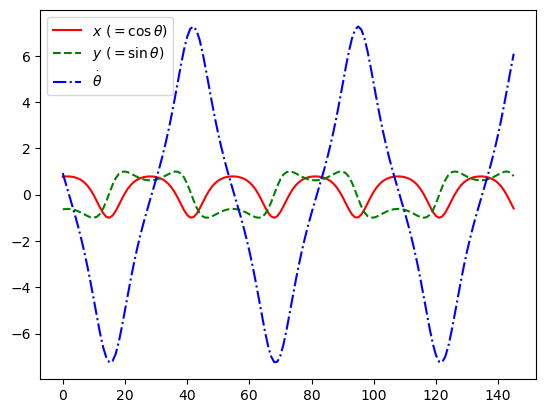

In [15]:
y_vec, u_vec, t_max = gen_trajectory(env,np.random.randint(100,high=201))
print(f'Starting point is theta={y_vec[0,:]}')
plt.plot(range(t_max), y_vec[:t_max,0],'r-',
         range(t_max), y_vec[:t_max,1],'g--',
         range(t_max), y_vec[:t_max,2],'b-.')
plt.legend([r'$x~(=\cos\theta)$', r'$y~(=\sin\theta)$', r'$\dot\theta$'])
plt.savefig('pendulum_example2.png')
plt.show()

**Findings:** The nonlinearities may prevent linear models to capture the data. 

**Resticted pendulum** For simplicity (and sinusoidal outputs) we wish to start pendulum always pointing downwards and with small initial velocity (not to allow move upward). It is cumbersome to rewrite the env.reset() function and therefore we wrap it by simple tria-and-error function. 

In [16]:
def pendulum_env_reset(env_):
    observation, info = env_.reset()
    while observation[0] > 0 or abs(observation[2]) > 0.1:
        observation, info = env_.reset()
    return observation,info

Rewrite the trajectory generation (re-run and make sure x (var[0]) is always negative and velocity (var[2]) is always less that 0.2

Starting point is theta=[-0.70487618  0.70933038  0.03581809]


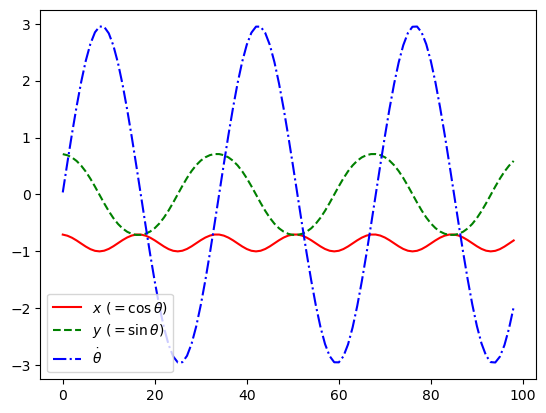

In [17]:
def gen_trajectory_restricted(env_, traj_len_):

    observation, info = pendulum_env_reset(env_)

    u_vec = np.empty((traj_len_,env_.action_space.shape[0]))
    y_vec = np.empty((traj_len_,env_.observation_space.shape[0]))

    for t in range(traj_len_):
        y_vec[t,:] = observation
        action = [0]
        u_vec[t] = action
        observation, reward, terminated, truncated, info = env.step(action)
    return y_vec, u_vec, t

# Verify it works
y_vec, u_vec, t_max = gen_trajectory_restricted(env,np.random.randint(100,high=201))
print(f'Starting point is theta={y_vec[0,:]}')
plt.plot(range(t_max), y_vec[:t_max,0],'r-',
         range(t_max), y_vec[:t_max,1],'g--',
         range(t_max), y_vec[:t_max,2],'b-.')
plt.legend([r'$x~(=\cos\theta)$', r'$y~(=\sin\theta)$', r'$\dot\theta$'])
plt.show()

#### MLP regression

Let's train an MLP neural network using the current state variables at time instant $t-1$
$$
\vec{x}_{t-1} = (\cos\theta_{t-1}, \sin\theta_{t-1}, \dot\theta_{t-1})^T
$$
as input, and their new predicted values as output
$$
\vec{y}_t = \vec{x}_t = f(\vec{x}_{t-1}) = \hat{\vec{x}}_t  \enspace ,
$$
where $\hat{\vec{x}}_t$ denotes an estimate of the true value $\vec{x}_t$.

Collect a training dataset of $N_{tr}$ samples. If the environment is terminated, it is restarted until enough samples in the training buffer. Let's utilize the following heuristic training steps:

 * Find a network structure and number of epochs so that the network completely learns 10 episodes (can overfit to data)
 * Search which error level should be achieved until training fit is good, and then add neurons and training data to achieve the same with validation data
 * Increase number of samples until it does not anymore overfit
 * Optimize everything for the validation data

Collect training data by sampling N training trajectories (of varying length)

In [18]:
num_of_tr_trajs = 10

samples_tr = []

tot_samples = 0
for t in range(num_of_tr_trajs):
    y_vec, u_vec, t_max = gen_trajectory_restricted(env,np.random.randint(100,high=201))
    tot_samples += t_max+1
    
    samples_tr.append(y_vec)
print(f'Generated the total of {tot_samples} samples')

Generated the total of 1437 samples


For input x and output y for regression y=f(x) so that x is always the previous sample $x=y_{t-1}$ for the current output $y_t$. 

In [19]:
import torch

s = samples_tr[0]
X_tr = torch.from_numpy(s[:-1])
Y_tr = torch.from_numpy(s[1:])
for t in range(1,len(samples_tr)):
    s = samples_tr[t]
    X = torch.from_numpy(s[:-1])
    Y = torch.from_numpy(s[1:])
    X_tr = torch.cat((X_tr,X),0)
    Y_tr = torch.cat((Y_tr,Y),0)
print(X_tr.shape)
print(Y_tr.shape)

torch.Size([1427, 3])
torch.Size([1427, 3])


#### Example: Training MLP for a fully observable environment

In [20]:
# STRAIGHTFORWARD CONSTRUCTION - BELOW IS CLASS CONSTRUCTION WHICH IS EASIER TO DEBUG
#import torch
# 
#model = torch.nn.Sequential()
#model.add_module("dense1", torch.nn.Linear(3, 16))
#model.add_module("act1", torch.nn.Sigmoid())
#model.add_module("dense2", torch.nn.Linear(16, 16))
#model.add_module("act2", torch.nn.Sigmoid())
#model.add_module("output", torch.nn.Linear(16, 3))
#
#print(model)

In [21]:
import torch

class myMLP(torch.nn.Module):
    def __init__(self, input_dim, hidden_size, output_dim):
        super().__init__()

        self.dense1 = torch.nn.Linear(input_dim, hidden_size)
        self.dense2 = torch.nn.Linear(hidden_size, hidden_size)
        self.output = torch.nn.Linear(hidden_size, output_dim)

    def forward(self, x):

        x = self.dense1(x)
        x = torch.nn.functional.sigmoid(x)
        x = self.dense2(x)
        x = torch.nn.functional.sigmoid(x)
        y_pred = self.output(x)

        return y_pred

Define loss and the optimizer

In [22]:
model_mlp = myMLP(samples_tr[0].shape[1],16,samples_tr[0].shape[1])
print(model_mlp)

loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model_mlp.parameters(), lr=0.001)

myMLP(
  (dense1): Linear(in_features=3, out_features=16, bias=True)
  (dense2): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=3, bias=True)
)


Train the model for some epochs (you should obtain training error below 0.03)

In [23]:
num_of_epochs = 2000

model_mlp.train()
for n in range(num_of_epochs):
    Y_pred = model_mlp(X_tr.float())
    loss = loss_fn(Y_pred, Y_tr)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if n % 100 == 0:
            print(f'   Epoch {n} training loss {loss.item()}')

   Epoch 0 training loss 1.1180745557420635
   Epoch 100 training loss 0.776813715917989
   Epoch 200 training loss 0.7159239095252556
   Epoch 300 training loss 0.49138384117226336
   Epoch 400 training loss 0.31250378690114283
   Epoch 500 training loss 0.2808297907461133
   Epoch 600 training loss 0.2401490000628783
   Epoch 700 training loss 0.16035875355642848
   Epoch 800 training loss 0.12813687718359054
   Epoch 900 training loss 0.10763623285133093
   Epoch 1000 training loss 0.0917271411380485
   Epoch 1100 training loss 0.08334346661397796
   Epoch 1200 training loss 0.07912789884519268
   Epoch 1300 training loss 0.07572582649584046
   Epoch 1400 training loss 0.07277926934112988
   Epoch 1500 training loss 0.07008727292524909
   Epoch 1600 training loss 0.0675344495688239
   Epoch 1700 training loss 0.06500631209460814
   Epoch 1800 training loss 0.062481152706956186
   Epoch 1900 training loss 0.059861859254073675


**On training data** Verify fit quality by testing how well the model can represent the training data

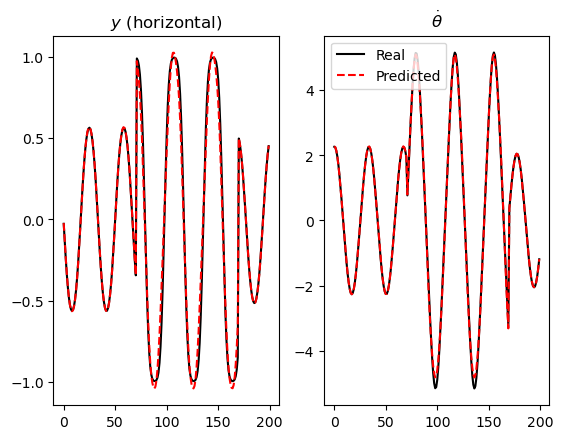

In [25]:
start_ind = np.random.randint(0,X_tr.shape[0])

model_mlp.eval()
Y_hat = model_mlp(X_tr[start_ind:start_ind+200].float()).detach()

plt.subplot(1,2,1)
plt.title(r'$y$ (horizontal)')
plt.plot(range(200), Y_tr[start_ind:start_ind+200,1], 'k-', range(200), Y_hat[:,1], 'r--')
plt.subplot(1,2,2)
plt.plot(range(200), Y_tr[start_ind:start_ind+200,2], 'k-', range(200), Y_hat[:,2], 'r--')
plt.title(r'$\dot\theta$')
plt.legend(['Real', 'Predicted'])
plt.show()

**On test data** Generate a new trajectory and test

In [26]:
y_vec, u_vec, t_max = gen_trajectory_restricted(env,np.random.randint(100,high=201))

X_te = torch.from_numpy(y_vec[:-1])
Y_te = torch.from_numpy(y_vec[1:])
print(X_te.shape)
print(Y_te.shape)

torch.Size([101, 3])
torch.Size([101, 3])


Compute predictions

In [27]:
Y_hat = model_mlp(X_te.float()).detach()

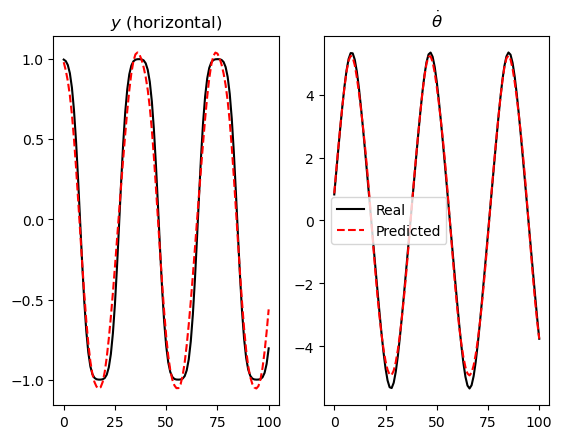

In [28]:
plt.subplot(1,2,1)
plt.title(r'$y$ (horizontal)')
plt.plot(range(t_max), Y_te[:n,1], 'k-', range(t_max), Y_hat[:n,1], 'r--')
plt.subplot(1,2,2)
plt.plot(range(t_max), Y_te[:n,2], 'k-', range(t_max), Y_hat[:n,2], 'r--')
plt.title(r'$\dot\theta$')
plt.legend(['Real', 'Predicted'])
plt.savefig('pendulum_mlp_regression.png')
plt.show()

**Generative mode** Generate the trajectory from the first sample

In [29]:
Y_hat = torch.empty(Y_te.shape)

Y_hat[0,:] = model_mlp(X_te[0,:].float())

for te_ind in range(1,Y_te.shape[0]):
    Y_hat[te_ind,:] = model_mlp(Y_hat[te_ind-1,:])
Y_hat = Y_hat.detach()

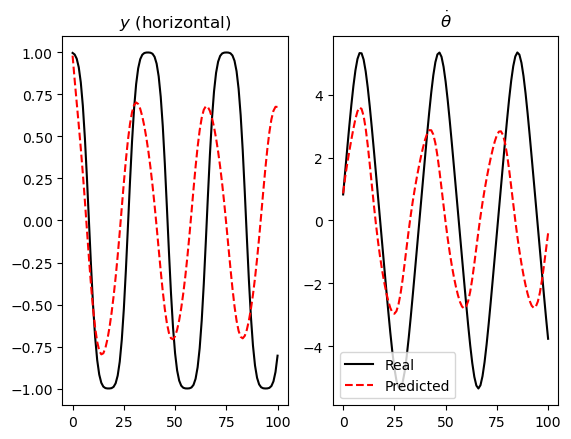

In [30]:
plt.subplot(1,2,1)
plt.title(r'$y$ (horizontal)')
plt.plot(range(t_max), Y_te[:n,1], 'k-', range(t_max), Y_hat[:n,1], 'r--')
plt.subplot(1,2,2)
plt.plot(range(t_max), Y_te[:n,2], 'k-', range(t_max), Y_hat[:n,2], 'r--')
plt.title(r'$\dot\theta$')
plt.legend(['Real', 'Predicted'])
plt.savefig('pendulum_mlp_generated.png')
plt.show()

**Findings:** Sometimes MLP works fine (when the first prediction is about correct), but sometimes behavior is not what happens in the training data (not continuous sinusoid)

#### LSTM

Construct a simple LSTM

In [54]:
class myLSTM(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lstm = torch.nn.LSTM(input_size, hidden_size)
        self.linear = torch.nn.Linear(hidden_size, output_size)


    def forward(self, X, h_t=None, c_t=None):
        if h_t is None:
          outputs, (h_t, c_t) = self.lstm(X)
          outputs = self.linear(outputs)
        else:
          outputs, (h_t, c_t) = self.lstm(X,(h_t,c_t))
          outputs = self.linear(outputs)

        return outputs, h_t, c_t

Use the same loss and optimization as MLP

In [32]:
model_rnn = myLSTM(samples_tr[0].shape[1],8,samples_tr[0].shape[1])

loss_fn_rnn = torch.nn.L1Loss()
#loss_fn_rnn = torch.nn.MSELoss()
optimizer_rnn = torch.optim.Adam(model_rnn.parameters(), lr=0.001)

Train LSTM (LSTM needs a scheduler to learn efficiently)

In [33]:
import torch.optim.lr_scheduler as lr_scheduler

num_of_epochs = 1000
optimizer_rnn = torch.optim.Adam(model_rnn.parameters(), lr=0.1)
scheduler = lr_scheduler.LinearLR(optimizer_rnn, start_factor=0.1, end_factor=0.0001, total_iters=num_of_epochs-100)
model_rnn.train()
for n in range(num_of_epochs):
    running_loss = 0.0
    for s in samples_tr:
        X = torch.from_numpy(s[:-1]).float()
        Y = torch.from_numpy(s[1:]).float()
        optimizer_rnn.zero_grad()
        Y_pred, _, _ = model_rnn(X)
        loss = loss_fn_rnn(Y_pred,Y)
        loss.backward()
        optimizer_rnn.step()
        running_loss += loss.item()
    scheduler.step()
    if n % 100 == 0:
        print(f'   Epoch {n} training loss {running_loss} (lr={optimizer_rnn.param_groups[0]["lr"]})')

   Epoch 0 training loss 8.852680563926697 (lr=0.009988900000000002)
   Epoch 100 training loss 0.1342917219735682 (lr=0.008878900000000002)
   Epoch 200 training loss 0.17555242404341698 (lr=0.007768900000000002)
   Epoch 300 training loss 0.12338752765208483 (lr=0.006658900000000002)
   Epoch 400 training loss 0.1136183044873178 (lr=0.0055489000000000024)
   Epoch 500 training loss 0.05930069042369723 (lr=0.0044389000000000026)
   Epoch 600 training loss 0.05539143458008766 (lr=0.0033289000000000027)
   Epoch 700 training loss 0.053239771630614996 (lr=0.002218900000000003)
   Epoch 800 training loss 0.027595862629823387 (lr=0.001108900000000003)
   Epoch 900 training loss 0.013861012586858124 (lr=9.999999999999547e-06)


**Evaluation** Compare MLP and RNN with newly generated data

In [50]:
y_vec, u_vec, t_max = gen_trajectory_restricted(env,np.random.randint(100,high=201))

X_te = torch.from_numpy(y_vec[:-1])
Y_te = torch.from_numpy(y_vec[1:])
print(X_te.shape)
print(Y_te.shape)

torch.Size([185, 3])
torch.Size([185, 3])


Run LSTM

In [51]:
model_rnn.eval()

Y_hat_rnn = torch.empty(Y_te.shape)
Y_hat_rnn[0,:], h_t, c_t = model_rnn(X_te[0,:].view(1,-1).float())

for te_ind in range(1,Y_te.shape[0]):
    Y_hat_rnn[te_ind,:], h_t, c_t = model_rnn(Y_hat_rnn[te_ind-1,:].view(1,-1), h_t, c_t)
Y_hat_rnn = Y_hat_rnn.detach()

Run MLP

In [52]:
model_mlp.eval()

Y_hat_mlp = torch.empty(Y_te.shape)
Y_hat_mlp[0,:] = model_mlp(X_te[0,:].float())

for te_ind in range(1,Y_te.shape[0]):
    Y_hat_mlp[te_ind,:] = model_mlp(Y_hat_mlp[te_ind-1,:])
Y_hat_mlp = Y_hat_mlp.detach()

Plot the both in the same figures

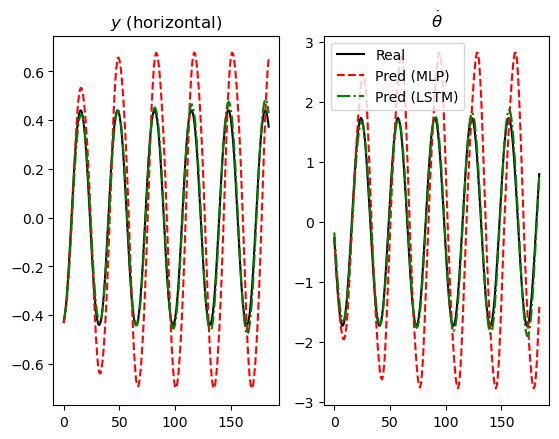

In [53]:
plt.subplot(1,2,1)
plt.title(r'$y$ (horizontal)')
plt.plot(range(Y_te.shape[0]), Y_te[:,1], 'k-', range(Y_te.shape[0]), Y_hat_mlp[:,1], 'r--', range(Y_te.shape[0]), Y_hat_rnn[:,1], 'g-.')
plt.subplot(1,2,2)
plt.plot(range(Y_te.shape[0]), Y_te[:,2], 'k-', range(Y_te.shape[0]), Y_hat_mlp[:,2], 'r--', range(Y_te.shape[0]), Y_hat_rnn[:,2], 'g-.')
plt.title(r'$\dot\theta$')
plt.legend(['Real', 'Pred (MLP)','Pred (LSTM)'])
plt.savefig('pendulum_mlp_vs_rnn_4.png')
plt.show()

Results show that the first 1-2 estimates are close to the starting point, but otherwise estimates are wrong. For example, what happens next is very different for a pendulum swinging from left to right than right to left. And the first action has very little effect to that.